## Environment Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# hack - https://github.com/googlecolab/colabtools/issues/3409#issuecomment-1446281277
import locale
locale.getpreferredencoding = lambda: "UTF-8"
! pip install -Uq ipdb
import ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.5 MB/s eta 0:00:00


In [3]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
%cd rapidsai-csp-utils
!git checkout 22.12-patch
%cd ..
!python rapidsai-csp-utils/colab/env-check.py
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 13.39 MiB/s, done.
Resolving deltas: 100% (191/191), done.
/content/rapidsai-csp-utils
Branch '22.12-patch' set up to track remote branch '22.12-patch' from 'origin'.
Switched to a new branch '22.12-patch'
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.4 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/env-check.py", line 26, in <module>
    gpu_name = pynvml.nvmlDeviceGetName(pynvml.nvmlDeviceGetHandleByIndex(0)).decode('UTF-8')
AttributeError: 'str' object has no attribute 'decode'. Did you mean: 'encode'?
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 26, in <module>
    gpu_name 

In [4]:
%%bash
# Install the Merlin Framework
pip install -Uq git+https://github.com/NVIDIA-Merlin/models.git@release-23.06
pip install -Uq git+https://github.com/NVIDIA-Merlin/nvtabular.git@release-23.06
pip install -Uq git+https://github.com/NVIDIA-Merlin/core.git@release-23.06
# pip install -Uq git+https://github.com/NVIDIA-Merlin/system.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/dataloader.git@release-23.04
pip install -Uq git+https://github.com/NVIDIA-Merlin/Transformers4Rec.git@release-23.06
# pip install -Uq xgboost lightfm implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 kB 569.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.5/985.5 kB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
%%bash
pip install -q tensorflow-recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 1.4 MB/s eta 0:00:00


In [6]:
import logging

# Set the logging level to a higher value (e.g., CRITICAL)
logging.basicConfig(level=logging.ERROR)

## Load Data
Reference
- https://github.com/NVIDIA-Merlin/models/blob/main/examples/02-Merlin-Models-and-NVTabular-integration.ipynb

In [7]:
import os
import shutil
import numpy as np
from nvtabular import ops
from merlin.schema.tags import Tags
import merlin.io
import merlin.models.tf as mm

import nvtabular as nvt

from os import path

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
pd = get_lib()

/usr/local/lib/python3.10/dist-packages/merlin/dtypes/mappings/triton.py:53: UserWarning: Triton dtype mappings did not load successfully due to an error: No module named 'tritonclient'
  warn(f"Triton dtype mappings did not load successfully due to an error: {exc.msg}")


In [8]:
DATA_DIR = os.environ.get(
    "DATA_DIR", os.path.expanduser("/content/drive/MyDrive/ml-twotower-model/data/")
)

In [9]:
import glob

USE_AUGMENTED_DATASET= True
DATA_VERSION = 'v4'

_TRAIN,_VALID,_TEST = ('train_aug', 'valid_aug', 'test_aug') if USE_AUGMENTED_DATASET else ('train', 'valid', 'test')

TRAIN_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TRAIN + f'_{DATA_VERSION}', "*.parquet")))
VALID_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _VALID + f'_{DATA_VERSION}', "*.parquet")))
TEST_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TEST + f'_{DATA_VERSION}', "*.parquet")))

TRAIN_PATHS, VALID_PATHS, TEST_PATHS

(['/content/drive/MyDrive/ml-twotower-model/data/train_aug_v4/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/valid_aug_v4/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/test_aug_v4/part_0.parquet'])

In [10]:
train = merlin.io.Dataset(
    TRAIN_PATHS, engine="parquet"
)
valid = merlin.io.Dataset(
    VALID_PATHS, engine="parquet"
)
test = merlin.io.Dataset(
    TEST_PATHS, engine="parquet"
)


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [11]:
schema = train.schema.select_by_tag([Tags.ITEM_ID, Tags.USER_ID, Tags.ITEM, Tags.USER])
schema

,name,tags,dtype,is_list,is_ragged,properties.max_size,properties.num_buckets,properties.freq_threshold,properties.embedding_sizes.cardinality,properties.embedding_sizes.dimension,properties.cat_path,properties.start_index,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.CATEGORICAL, Tags.ID, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,1665.0,102.0,.//categories/unique.movie_id.parquet,0.0,0,1664,movie_id,NaN,NaN
1,user_id,"(Tags.CATEGORICAL, Tags.ID, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,944.0,74.0,.//categories/unique.user_id.parquet,0.0,0,943,user_id,NaN,NaN
2,gender,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,3.0,16.0,.//categories/unique.gender.parquet,0.0,0,2,gender,NaN,NaN
3,occupation,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,22.0,16.0,.//categories/unique.occupation.parquet,0.0,0,21,occupation,NaN,NaN
4,genres,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,0.0,None,0.0,20.0,16.0,.//categories/unique.genres.parquet,0.0,0,19,genres,0.0,NaN
5,synopsis,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,1665.0,102.0,.//categories/unique.synopsis.parquet,0.0,0,1664,synopsis,NaN,NaN
6,title,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,1665.0,102.0,.//categories/unique.title.parquet,0.0,0,1664,title,NaN,NaN
7,cast,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,0.0,None,0.0,4760.0,183.0,.//categories/unique.cast.parquet,0.0,0,4759,cast,0.0,NaN


In [12]:
#sanity check
train.to_ddf().head()

,movie_id,movie_id_raw,user_id,gender,occupation,genres,rating,synopsis,title,cast
0,337,1012,7,2,1,"[2, 1]",1,336,336,"[1383, 1384, 1393, 1392, 1388, 1385]"
1,77,245,109,2,8,"[1, 8, 4, 3]",0,77,77,"[2, 30, 106, 558, 514]"
2,5,294,509,1,10,[2],0,5,5,"[46, 203, 204, 58, 202]"
3,614,948,94,2,1,"[2, 5]",0,619,617,"[2117, 2106, 973, 2114, 2091]"
4,1184,1251,104,2,8,[2],1,1196,1182,"[3545, 3532, 3503, 3520]"


In [13]:
# select only trainable features and exclude the target
train.schema = schema
valid.schema = schema

In [14]:
assert len(schema.select_by_tag(Tags.TARGET).column_names) == 0

## Augment with custom pre-trained embeddings

### Load embeddings

In [15]:
FULL_DATASET = True
embedding_path = f'embeddings_train_index_{DATA_VERSION}.parquet'
movie_id_col_to_use = 'movie_id'
if FULL_DATASET:
    embedding_path = f'embeddings_full_index_{DATA_VERSION}.parquet'
    movie_id_col_to_use = 'movie_id_raw'

# embeddings = pd.read_parquet(os.path.join(DATA_DIR, f'embeddings_train_index_{DATA_VERSION}.parquet'))
embeddings = pd.read_parquet(os.path.join(DATA_DIR, embedding_path))

embeddings.shape

(1664, 3)

In [16]:
# sanity check that movie index "0" is missing
embeddings.sort_values(movie_id_col_to_use)

,movie_id_raw,title_embeddings,synopsis_embeddings
41,1,"[-0.1271020621061325, -0.3848617672920227, -0....","[-0.23947608470916748, 0.04749224707484245, 0...."
305,2,"[-0.13687743246555328, -0.20053081214427948, -...","[-0.22074897587299347, 0.022454295307397842, 0..."
72,3,"[-0.01994566060602665, -0.20462116599082947, -...","[0.11733447015285492, 0.0836687907576561, 0.37..."
288,4,"[-0.0068391780368983746, -0.3333335518836975, ...","[-0.07648835331201553, 0.1145646795630455, 0.2..."
679,5,"[-0.3565199673175812, -0.2376198172569275, -0....","[-0.0027327132411301136, -0.1977999061346054, ..."
...,...,...,...
1340,1678,"[-0.0655791163444519, -0.003532692324370146, -...","[-0.19522230327129364, 0.31564751267433167, 0...."
1339,1679,"[0.009984835051000118, -0.04608602076768875, -...","[-0.07188992202281952, -0.14516761898994446, 0..."
930,1680,"[0.149348646402359, 0.009134890511631966, -0.0...","[-0.24428804218769073, -0.14837390184402466, 0..."
1619,1681,"[0.3425954580307007, -0.2802436947822571, 0.20...","[-0.2569529414176941, 0.2592751979827881, 0.16..."


In [17]:
# can be handled better with dask, but we will use pd
train_df = train.to_ddf().compute()
valid_df = valid.to_ddf().compute()
test_df = test.to_ddf().compute()

#### Synopsis Embeddings
- Synopsis embedding will use label encoded synopsis as lookup index

In [18]:
train_movie_id_synopsis_df = train_df[[movie_id_col_to_use, 'synopsis']].groupby([movie_id_col_to_use, 'synopsis'], as_index=False).count()
movie_id_synopsis_df = train_movie_id_synopsis_df
if FULL_DATASET:
    valid_movie_id_synopsis_df = valid_df[[movie_id_col_to_use, 'synopsis']].groupby([movie_id_col_to_use, 'synopsis'], as_index=False).count()
    test_movie_id_synopsis_df = test_df[[movie_id_col_to_use, 'synopsis']].groupby([movie_id_col_to_use, 'synopsis'], as_index=False).count()

    movie_id_synopsis_df = pd.concat((train_movie_id_synopsis_df, valid_movie_id_synopsis_df, test_movie_id_synopsis_df), axis=0, ignore_index=True).drop_duplicates()

movie_id_synopsis_df

,movie_id_raw,synopsis
0,1,8
1,2,240
2,3,375
3,4,108
4,5,390
...,...,...
4374,1669,1645
4375,1671,1580
4376,1674,1595
4377,1677,1607


In [19]:
idx_synopsis_embeddings_df = pd.merge(movie_id_synopsis_df[[movie_id_col_to_use, 'synopsis']],
                                      embeddings[[movie_id_col_to_use, 'synopsis_embeddings']], on=movie_id_col_to_use).drop(movie_id_col_to_use, axis=1).set_index('synopsis').sort_index()
# sanity check synopsis=0 has no embeddings
idx_synopsis_embeddings_df

,synopsis_embeddings
synopsis,
1,"[-0.4067784249782562, -0.014127916656434536, 0..."
2,"[-0.032858122140169144, 0.09768732637166977, 0..."
3,"[0.04936177283525467, -0.06918485462665558, 0...."
4,"[-0.16613557934761047, -0.041616834700107574, ..."
5,"[-0.06875813752412796, 0.1845909059047699, 0.2..."
...,...
1660,"[-0.12424704432487488, 0.10214965045452118, 0...."
1661,"[-0.17334190011024475, 0.059408169239759445, -..."
1662,"[-0.09875628352165222, -0.09560519456863403, 0..."


In [20]:
# add synopsis=0 embeddings
idx_synopsis_embeddings_df.loc[0, 'synopsis_embeddings'] = np.mean(idx_synopsis_embeddings_df['synopsis_embeddings'])
idx_synopsis_embeddings_df.sort_index(inplace=True)
idx_synopsis_embeddings_df

,synopsis_embeddings
synopsis,
0,"[-0.07655343072853454, 0.04274995435513828, 0...."
1,"[-0.4067784249782562, -0.014127916656434536, 0..."
2,"[-0.032858122140169144, 0.09768732637166977, 0..."
3,"[0.04936177283525467, -0.06918485462665558, 0...."
4,"[-0.16613557934761047, -0.041616834700107574, ..."
...,...
1660,"[-0.12424704432487488, 0.10214965045452118, 0...."
1661,"[-0.17334190011024475, 0.059408169239759445, -..."
1662,"[-0.09875628352165222, -0.09560519456863403, 0..."


In [21]:
synopsis_embeddings = np.stack(idx_synopsis_embeddings_df['synopsis_embeddings'])
#sanity check
assert (synopsis_embeddings[1] == idx_synopsis_embeddings_df.loc[1, 'synopsis_embeddings']).all()

#### Title Embeddings
- Title embedding will use label encoded title as lookup index

In [22]:
train_movie_id_title_df = train_df[[movie_id_col_to_use, 'title']].groupby([movie_id_col_to_use, 'title'], as_index=False).count()
movie_id_title_df = train_movie_id_title_df
if FULL_DATASET:
    valid_movie_id_title_df = valid_df[[movie_id_col_to_use, 'title']].groupby([movie_id_col_to_use, 'title'], as_index=False).count()
    test_movie_id_title_df = test_df[[movie_id_col_to_use, 'title']].groupby([movie_id_col_to_use, 'title'], as_index=False).count()

    movie_id_title_df = pd.concat((train_movie_id_title_df, valid_movie_id_title_df, test_movie_id_title_df), axis=0, ignore_index=True).drop_duplicates()

movie_id_title_df

,movie_id_raw,title
0,1,8
1,2,239
2,3,373
3,4,109
4,5,389
...,...,...
4374,1669,1591
4375,1671,1632
4376,1674,1589
4377,1677,1581


In [23]:
idx_title_embeddings_df = pd.merge(movie_id_title_df[[movie_id_col_to_use, 'title']],
                                      embeddings[[movie_id_col_to_use, 'title_embeddings']], on=movie_id_col_to_use).drop(movie_id_col_to_use, axis=1).set_index('title').sort_index()
# sanity check title=0 has no embeddings
idx_title_embeddings_df

,title_embeddings
title,
1,"[-0.09145651757717133, -0.0811767429113388, -0..."
2,"[-0.043679703027009964, -0.21339358389377594, ..."
3,"[-0.06971988081932068, -0.32740920782089233, -..."
4,"[-0.10080163925886154, -0.14979299902915955, -..."
5,"[0.20293867588043213, -0.21028143167495728, -0..."
...,...
1660,"[0.04619225487112999, -0.33449605107307434, -0..."
1661,"[-0.16195717453956604, -0.04123103991150856, 0..."
1662,"[0.07549984753131866, -0.18107983469963074, -0..."


In [24]:
# add title=0 embeddings
idx_title_embeddings_df.loc[0, 'title_embeddings'] = np.mean(idx_title_embeddings_df['title_embeddings'])
idx_title_embeddings_df.sort_index(inplace=True)
idx_title_embeddings_df

,title_embeddings
title,
0,"[-0.054924961270514286, -0.1981357344611227, -..."
1,"[-0.09145651757717133, -0.0811767429113388, -0..."
2,"[-0.043679703027009964, -0.21339358389377594, ..."
3,"[-0.06971988081932068, -0.32740920782089233, -..."
4,"[-0.10080163925886154, -0.14979299902915955, -..."
...,...
1660,"[0.04619225487112999, -0.33449605107307434, -0..."
1661,"[-0.16195717453956604, -0.04123103991150856, 0..."
1662,"[0.07549984753131866, -0.18107983469963074, -0..."


In [25]:
title_embeddings = np.stack(idx_title_embeddings_df['title_embeddings'])
#sanity check
assert (title_embeddings[1] == idx_title_embeddings_df.loc[1, 'title_embeddings']).all()

## Build Model
Reference
- https://github.com/NVIDIA-Merlin/models/blob/main/examples/05-Retrieval-Model.ipynb
- https://github.com/NVIDIA-Merlin/models/blob/main/examples/usecases/entertainment-with-pretrained-embeddings.ipynb

### Use Custom Embedding

In [26]:
schema

,name,tags,dtype,is_list,is_ragged,properties.max_size,properties.num_buckets,properties.freq_threshold,properties.embedding_sizes.cardinality,properties.embedding_sizes.dimension,properties.cat_path,properties.start_index,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.CATEGORICAL, Tags.ID, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,1665.0,102.0,.//categories/unique.movie_id.parquet,0.0,0,1664,movie_id,NaN,NaN
1,user_id,"(Tags.CATEGORICAL, Tags.ID, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,944.0,74.0,.//categories/unique.user_id.parquet,0.0,0,943,user_id,NaN,NaN
2,gender,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,3.0,16.0,.//categories/unique.gender.parquet,0.0,0,2,gender,NaN,NaN
3,occupation,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,22.0,16.0,.//categories/unique.occupation.parquet,0.0,0,21,occupation,NaN,NaN
4,genres,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,0.0,None,0.0,20.0,16.0,.//categories/unique.genres.parquet,0.0,0,19,genres,0.0,NaN
5,synopsis,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,1665.0,102.0,.//categories/unique.synopsis.parquet,0.0,0,1664,synopsis,NaN,NaN
6,title,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,1665.0,102.0,.//categories/unique.title.parquet,0.0,0,1664,title,NaN,NaN
7,cast,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,0.0,None,0.0,4760.0,183.0,.//categories/unique.cast.parquet,0.0,0,4759,cast,0.0,NaN


In [27]:
# swap synopsis embedding
schema['synopsis'].properties['embedding_sizes'] = {
    'cardinality': float(synopsis_embeddings.shape[0]),
    'dimension': float(synopsis_embeddings.shape[1])
}

# swap title embdeddings
schema['title'].properties['embedding_sizes'] = {
    'cardinality': float(title_embeddings.shape[0]),
    'dimension': float(title_embeddings.shape[1])
}

schema

,name,tags,dtype,is_list,is_ragged,properties.max_size,properties.num_buckets,properties.freq_threshold,properties.embedding_sizes.cardinality,properties.embedding_sizes.dimension,properties.cat_path,properties.start_index,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.CATEGORICAL, Tags.ID, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,1665.0,102.0,.//categories/unique.movie_id.parquet,0.0,0,1664,movie_id,NaN,NaN
1,user_id,"(Tags.CATEGORICAL, Tags.ID, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,944.0,74.0,.//categories/unique.user_id.parquet,0.0,0,943,user_id,NaN,NaN
2,gender,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,3.0,16.0,.//categories/unique.gender.parquet,0.0,0,2,gender,NaN,NaN
3,occupation,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,22.0,16.0,.//categories/unique.occupation.parquet,0.0,0,21,occupation,NaN,NaN
4,genres,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,0.0,None,0.0,20.0,16.0,.//categories/unique.genres.parquet,0.0,0,19,genres,0.0,NaN
5,synopsis,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,1665.0,768.0,.//categories/unique.synopsis.parquet,0.0,0,1664,synopsis,NaN,NaN
6,title,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,1665.0,768.0,.//categories/unique.title.parquet,0.0,0,1664,title,NaN,NaN
7,cast,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,0.0,None,0.0,4760.0,183.0,.//categories/unique.cast.parquet,0.0,0,4759,cast,0.0,NaN


In [28]:
# set schema for train and validation set
train.schema = schema
valid.schema = schema

In [29]:
embed_dims = {}
embed_dims["synopsis"] = synopsis_embeddings.shape[1]
embed_dims["title"] = title_embeddings.shape[1]

embeddings_init={
    "synopsis": mm.TensorInitializer(synopsis_embeddings),
    "title": mm.TensorInitializer(title_embeddings),
}

item_embeddings_block = mm.Embeddings(
    train.schema.select_by_tag(Tags.ITEM),
    infer_embedding_sizes=True,
    embeddings_initializer=embeddings_init,
    trainable={
        'synopsis': False,
        'title': False
        },
    dim=embed_dims,
)

### Model definition

In [33]:
import tensorflow as tf

In [34]:
def build_towers(schema=schema, tower_dim = (128, 64), neg_sampler=['in-batch'], embedding_dims=None):
    if not neg_sampler:
        neg_sampler = ['in-batch']
    # create user schema using USER tag
    user_schema = schema.select_by_tag(Tags.USER)
    # create user (query) tower input block
    user_inputs = mm.InputBlockV2(user_schema)
    # create user (query) encoder block
    query = mm.Encoder(user_inputs, mm.MLPBlock(tower_dim, no_activation_last_layer=True))

    # create item schema using ITEM tag
    item_schema = schema.select_by_tag(Tags.ITEM)
    # create item (candidate) tower input block
    item_inputs = mm.InputBlockV2(item_schema, categorical=item_embeddings_block)
    # create item (candidate) encoder block
    candidate = mm.Encoder(item_inputs, mm.MLPBlock(tower_dim, no_activation_last_layer=True))

    def _switch_emb_dims(block, features):
        for l in block.layers[0].layers:
            if l.table.name in features:
                l.table.output_dim = features[l.table.name]

    if embedding_dims:
        if embedding_dims.get('user'):
            _switch_emb_dims(user_inputs, embedding_dims.get('user'))
        if embedding_dims.get('item'):
            _switch_emb_dims(item_inputs, embedding_dims.get('user'))

    return mm.TwoTowerModelV2(query, candidate,
                              negative_samplers=neg_sampler)



In [35]:
import matplotlib.pyplot as plt
import numpy as np
import math

default_plot_metrics = {
    'Loss': 'loss',
    'Recall@10': 'recall_at_10',
    'Ndcg@10': 'ndcg_at_10',
    'AUC': 'auc'
}

def plot_metrics(train_history, val_history=None, metrics=default_plot_metrics, figsize=None, max_row=4):
    # Create a figure and axis
    X = math.ceil(len(metrics)/max_row)
    Y = max_row if len(metrics) > max_row else len(metrics)

    if figsize is None:
        figsize = (18, 3*X)

    fig, ax = plt.subplots(X, Y, figsize=figsize)
    metric_map = {}

    for i, (k, m) in enumerate(metrics.items()):
        _ax = ax
        if X > 1 :
            _ax = ax[i//max_row]
            i %= max_row
        train_metric = train_history[m]
        if val_history:
            val_metric = val_history[m]
        epochs = np.arange(1, len(train_metric) + 1)

        # Plot metric
        _ax[i].plot(epochs, train_metric, label=f'Train {k}', marker='o')
        if val_history:
            _ax[i].plot(epochs, val_metric, label=f'Validation {k}', marker='o')
        _ax[i].set_xlabel('Epochs')
        _ax[i].set_ylabel(k)
        _ax[i].set_title(f'{k} Over Epochs')
        _ax[i].legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [36]:
from collections import defaultdict
def merge_model_history(*history):
    _history = defaultdict(list)
    for _h in history:
        h = _h.history
        for k,v in h.items():
            _history[k].extend(v)
    return _history


In [37]:
# hack block, as Merlin top_k_encoder is broken
from merlin.models.tf.loader import Loader
from merlin.schema import ColumnSchema, Schema, Tags
def batch_predict(
        self,
        dataset: merlin.io.Dataset,
        batch_size: int,
        output_schema = None,
        index = None,
        **kwargs,
    ) -> merlin.io.Dataset:
        """Batched prediction using Dask.
        Parameters
        ----------
        dataset: merlin.io.Dataset
            Dataset to predict on.
        batch_size: int
            Batch size to use for prediction.
        Returns
        -------
        merlin.io.Dataset
        """

        if index:
            if isinstance(index, ColumnSchema):
                index = Schema([index])
            elif isinstance(index, str):
                index = Schema([self.schema[index]])
            elif isinstance(index, Tags):
                index = self.schema.select_by_tag(index)
            elif not isinstance(index, Schema):
                raise ValueError(f"Invalid index: {index}")

            if len(index) != 1:
                raise ValueError("Only one column can be used as index")
            index = index.first.name

        if hasattr(dataset, "schema"):
            if not set(self.schema.column_names).issubset(set(dataset.schema.column_names)):
                raise ValueError(
                    f"Model schema {self.schema.column_names} does not match dataset schema"
                    + f" {dataset.schema.column_names}"
                )

        # Check if merlin-dataset is passed
        if hasattr(dataset, "to_ddf"):
            # hack
            dataset = dataset.to_ddf().compute()

        from merlin.models.tf.utils.batch_utils import TFModelEncode

        model_encode = TFModelEncode(self, batch_size=batch_size, **kwargs)
        encode_kwargs = {}
        if output_schema:
            encode_kwargs["filter_input_columns"] = output_schema.column_names
        # hack
        predictions = model_encode(dataset, **encode_kwargs)
        if index:
            predictions = predictions.set_index(index)

        return merlin.io.Dataset(predictions)

from merlin.models.tf.core.encoder import TopKEncoder
def to_top_k_encoder(
        model,
        candidates: merlin.io.Dataset = None,
        candidate_id=Tags.ITEM_ID,
        strategy = "brute-force-topk",
        k: int = 10,
        batch_size = 512
):
    output_schema = model.schema.select_by_tag(candidate_id)

    # https://github.com/NVIDIA-Merlin/models/blob/stable/merlin/models/tf/models/base.py#L2479
    candidates_embeddings = batch_predict(
                model.candidate_encoder,
                candidates,
                batch_size=batch_size,
                output_schema=output_schema,
                index=candidate_id,
                output_concat_func=np.concatenate,
            )
    return TopKEncoder(
            model.query_encoder,
            topk_layer=strategy,
            k=k,
            candidates=candidates_embeddings,
            target=model.encoder._schema.select_by_tag(candidate_id).first.name,
        )

In [88]:
# Top-K evaluation
from merlin.models.utils.dataset import unique_rows_by_features
# from functools import cache


def get_candidates(data, tags=[Tags.ITEM, Tags.ITEM_ID]):
    candidate_features = unique_rows_by_features(data, *tags)
    print(f'Candidate set rows:', candidate_features.num_rows)
    return candidate_features


def recommendation_centric_metrics(topk_model, ds, catalog, batch_size=2048):
    candidate_features = get_candidates(ds, [Tags.USER, Tags.USER_ID])
    catalog_items = set(catalog.keys())

    novelty_scores = []
    eval_loader = mm.Loader(candidate_features, batch_size=batch_size, shuffle=False)
    _iter = iter(eval_loader)
    for batch, _ in _iter:
        recs = topk_model(batch)[1].numpy()
        # novelty
        rec_popularity = [catalog[item[0]] for item in recs if item[0] in catalog_items]
        if rec_popularity:
            novelty_scores.append(1 / np.mean(rec_popularity))
    # Calculate overall novelty
    overall_novelty = np.mean(novelty_scores)

    # Flatten the list of recommended items and convert it to a set
    unique_recommended_items = set(item for u_rec in recs for item in u_rec)

    # Calculate the intersection of unique recommended items and catalog items
    covered_items = unique_recommended_items.intersection(catalog_items)

    # Calculate the catalog coverage
    coverage = len(covered_items) / len(catalog)
    return dict(
        coverage=coverage,
        novelty=overall_novelty
    )


def evaluate_model(model, ds, topk=10, batch_size=1024, item_id='movie_id'):
    candidate_features = get_candidates(ds)

    topk_model = to_top_k_encoder(model, candidate_features, k=topk, batch_size=batch_size)
    topk_model.compile(run_eagerly=False, metrics=[ tf.keras.metrics.AUC(from_logits=True),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=[topk])
                                            ])
    eval_loader = mm.Loader(ds, batch_size=batch_size).map(mm.ToTarget(schema, item_id))
    catalog = ds.to_ddf().compute()[item_id].value_counts().to_dict()
    return topk_model.evaluate(eval_loader, return_dict=True) | recommendation_centric_metrics(topk_model, ds, catalog)

In [39]:
from tensorflow.keras.callbacks import Callback
from collections import defaultdict

class EvaluationCallback(Callback):
    def __init__(self, period, topk, data, type_):
        super(EvaluationCallback, self).__init__()
        self.period = period
        self.topk=topk
        self.data = data
        self.type_ = type_
        self.records = defaultdict(list)

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.period == 0:
            # Perform custom actions at the specified frequency
            res = evaluate_model(self.model, self.data, topk=self.topk)
            for k, m in res.items():
                k = 'auc' if k.startswith('auc') else k
                self.records[k].append(m)
            print(f"{self.type_} dataset topk evaluation {res}")

    def get_records(self):
        return self.records


### model_v1

In [ ]:
_tower_dim = (512, 256) # @param
_learning_rate = 0.01 # @param
_batch_size = 1024 # @param
_epochs = 10 # @param
_validation_batch_size = 256 # @param


In [ ]:
model_v1 = build_towers(train.schema, tower_dim=_tower_dim)
TOP_K = [100, 10]
model_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True,
                                                            #  reduction=tf.keras.losses.Reduction.SUM # https://github.com/tensorflow/recommenders/blob/v0.7.3/tensorflow_recommenders/tasks/retrieval.py#L84
                                                             ),
)
history_v1 = []

#### model

In [ ]:
_epochs = 20
history_v1.append(
    model_v1.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs, validation_batch_size=_validation_batch_size)
)

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed i

Epoch 1/10
69/69 [==============================] - 6s 61ms/step - loss: 6.2156 - auc_1: 0.5938 - recall_at_100: 0.4121 - mrr_at_100: 0.0521 - ndcg_at_100: 0.1156 - map_at_100: 0.0521 - precision_at_100: 0.0041 - recall_at_10: 0.1008 - mrr_at_10: 0.0428 - ndcg_at_10: 0.0562 - map_at_10: 0.0428 - precision_at_10: 0.0101 - regularization_loss: 0.0000e+00 - loss_batch: 6.2020 - val_loss: 6.9233 - val_auc_1: 0.5546 - val_recall_at_100: 0.2379 - val_mrr_at_100: 0.0152 - val_ndcg_at_100: 0.0529 - val_map_at_100: 0.0152 - val_precision_at_100: 0.0024 - val_recall_at_10: 0.0293 - val_mrr_at_10: 0.0095 - val_ndcg_at_10: 0.0140 - val_map_at_10: 0.0095 - val_precision_at_10: 0.0029 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 6.7964
Epoch 2/10
69/69 [==============================] - 7s 62ms/step - loss: 6.2156 - auc_1: 0.5955 - recall_at_100: 0.4089 - mrr_at_100: 0.0520 - ndcg_at_100: 0.1149 - map_at_100: 0.0520 - precision_at_100: 0.0041 - recall_at_10: 0.1001 - mrr_at_10: 0.0428 - n

#### analysis

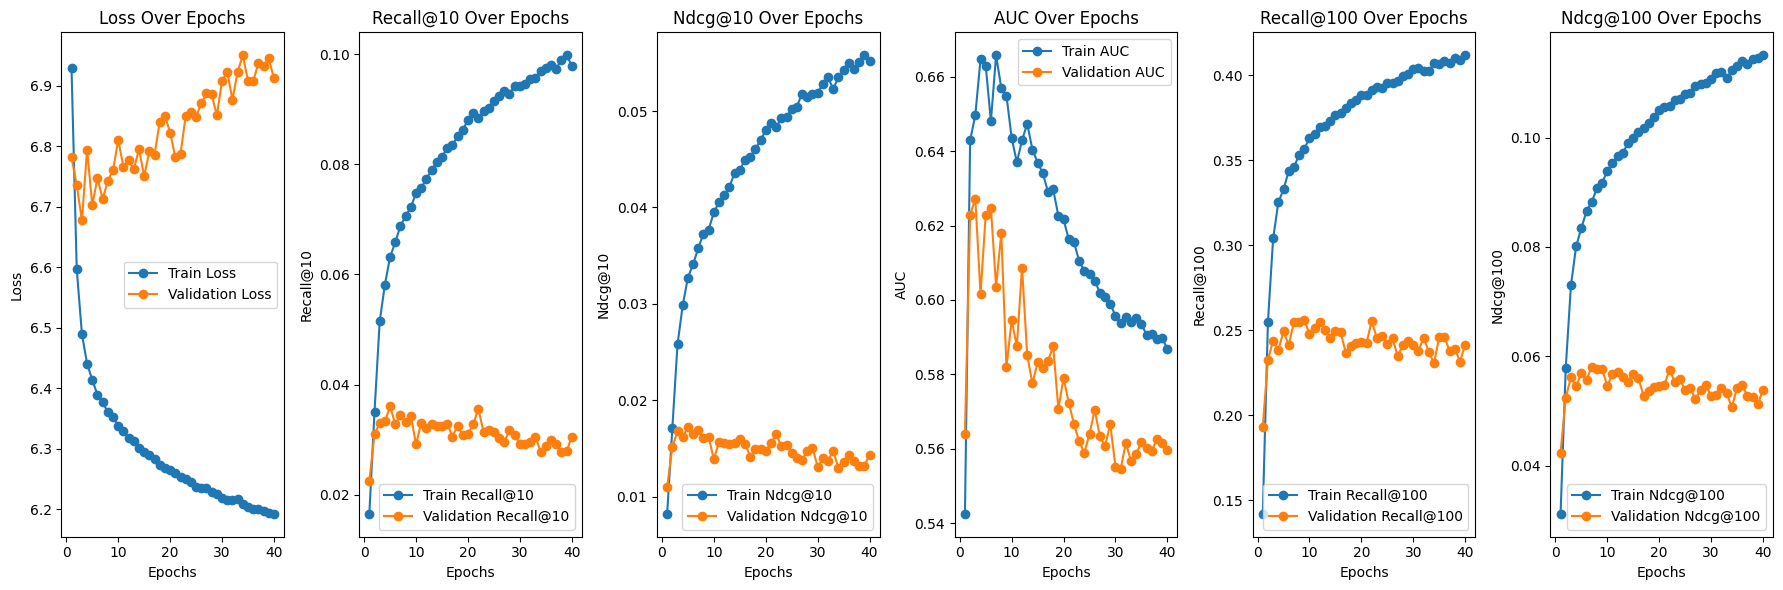

In [ ]:
_history = merge_model_history(*history_v1)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': AUC_TERM, **METRIC_AT})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

#### eval

In [ ]:
(model_v1.evaluate(train, batch_size=2048, return_dict=True),
 model_v1.evaluate(valid, batch_size=2048, return_dict=True))

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(


35/35 [==============================] - 3s 41ms/step - loss: 6.8182 - auc_1: 0.5883 - recall_at_100: 0.2867 - mrr_at_100: 0.0391 - ndcg_at_100: 0.0827 - map_at_100: 0.0391 - precision_at_100: 0.0029 - recall_at_10: 0.0716 - mrr_at_10: 0.0328 - ndcg_at_10: 0.0418 - map_at_10: 0.0328 - precision_at_10: 0.0072 - regularization_loss: 0.0000e+00 - loss_batch: 6.7540


/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(


8/8 [==============================] - 1s 50ms/step - loss: 7.5880 - auc_1: 0.5569 - recall_at_100: 0.1210 - mrr_at_100: 0.0218 - ndcg_at_100: 0.0382 - map_at_100: 0.0218 - precision_at_100: 0.0012 - recall_at_10: 0.0248 - mrr_at_10: 0.0193 - ndcg_at_10: 0.0205 - map_at_10: 0.0193 - precision_at_10: 0.0025 - regularization_loss: 0.0000e+00 - loss_batch: 7.4542


({'loss': 6.818248748779297,
  'auc_1': 0.5883374214172363,
  'recall_at_100': 0.29151591658592224,
  'mrr_at_100': 0.040543332695961,
  'ndcg_at_100': 0.08475490659475327,
  'map_at_100': 0.040543332695961,
  'precision_at_100': 0.002915159100666642,
  'recall_at_10': 0.07447081059217453,
  'mrr_at_10': 0.03409094363451004,
  'ndcg_at_10': 0.04345601052045822,
  'map_at_10': 0.03409094363451004,
  'precision_at_10': 0.007447082083672285,
  'regularization_loss': 0.0,
  'loss_batch': 5.474366188049316},
 {'loss': 7.588003635406494,
  'auc_1': 0.5569407939910889,
  'recall_at_100': 0.13895948231220245,
  'mrr_at_100': 0.019466230645775795,
  'ndcg_at_100': 0.03934381902217865,
  'map_at_100': 0.019466230645775795,
  'precision_at_100': 0.0013895946322008967,
  'recall_at_10': 0.024073826149106026,
  'mrr_at_10': 0.01644575037062168,
  'ndcg_at_10': 0.018181314691901207,
  'map_at_10': 0.01644575037062168,
  'precision_at_10': 0.00240738270804286,
  'regularization_loss': 0.0,
  'loss_ba

In [ ]:
evaluate_model(model_v1, train, topk=100)

Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.1

69/69 [==============================] - 6s 17ms/step - loss: 1.7271 - auc_8: 0.5067 - recall_at_100: 0.3721 - mrr_at_100: 0.0278 - ndcg_at_100: 0.0870 - map_at_100: 0.0278 - precision_at_100: 0.0037 - regularization_loss: 0.0000e+00 - loss_batch: 1.7300


{'loss': 1.7270898818969727,
 'auc_8': 0.5067149996757507,
 'recall_at_100': 0.3709295988082886,
 'mrr_at_100': 0.027174249291419983,
 'ndcg_at_100': 0.08621855825185776,
 'map_at_100': 0.027174249291419983,
 'precision_at_100': 0.003709295531734824,
 'regularization_loss': 0.0,
 'loss_batch': 1.870174527168274}

In [ ]:
evaluate_model(model_v1, valid, topk=100)

Candidate set rows: 1338


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:264: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.1

15/15 [==============================] - 3s 20ms/step - loss: 1.0184 - auc_9: 0.5055 - recall_at_100: 0.2015 - mrr_at_100: 0.0072 - ndcg_at_100: 0.0391 - map_at_100: 0.0072 - precision_at_100: 0.0020 - regularization_loss: 0.0000e+00 - loss_batch: 1.0692


{'loss': 1.0183708667755127,
 'auc_9': 0.5054721236228943,
 'recall_at_100': 0.2089741826057434,
 'mrr_at_100': 0.007981506176292896,
 'ndcg_at_100': 0.04101260378956795,
 'map_at_100': 0.007981506176292896,
 'precision_at_100': 0.002089741639792919,
 'regularization_loss': 0.0,
 'loss_batch': 1.600872278213501}

#### tmp

In [ ]:
tf.keras.utils.plot_model(model_v1.layers, to_file='model_v1.png', show_shapes=True)

AttributeError: ignored

In [ ]:
model_v1.

True

### model_v6

In [71]:
_tower_dim = (128, 64) # @param

_learning_rate = 0.01 # @param
# _batch_size = 4096 # @param
_batch_size = 2048 * 2 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = 1024 # @param
# _popularity_sampler = True
_validation_freq = 5 # @param


In [72]:
model_v6 = build_towers(train.schema, tower_dim=_tower_dim)
TOP_K = [100, 10]
model_v6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)
history_v6 = []

#### model

In [200]:
_epochs = 100
history_v6.append(
    model_v6.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs, validation_batch_size=_validation_batch_size)
)

Epoch 1/100
69/69 [==============================] - 5s 55ms/step - loss: 6.0683 - auc_1: 0.5644 - recall_at_100: 0.4592 - mrr_at_100: 0.0693 - ndcg_at_100: 0.1387 - map_at_100: 0.0693 - precision_at_100: 0.0046 - recall_at_10: 0.1286 - mrr_at_10: 0.0592 - ndcg_at_10: 0.0753 - map_at_10: 0.0592 - precision_at_10: 0.0129 - regularization_loss: 0.0000e+00 - loss_batch: 6.0525 - val_loss: 7.1617 - val_auc_1: 0.5430 - val_recall_at_100: 0.2306 - val_mrr_at_100: 0.0123 - val_ndcg_at_100: 0.0490 - val_map_at_100: 0.0123 - val_precision_at_100: 0.0023 - val_recall_at_10: 0.0229 - val_mrr_at_10: 0.0066 - val_ndcg_at_10: 0.0103 - val_map_at_10: 0.0066 - val_precision_at_10: 0.0023 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 7.5323
Epoch 2/100
69/69 [==============================] - 4s 42ms/step - loss: 6.0658 - auc_1: 0.5676 - recall_at_100: 0.4552 - mrr_at_100: 0.0694 - ndcg_at_100: 0.1383 - map_at_100: 0.0694 - precision_at_100: 0.0046 - recall_at_10: 0.1292 - mrr_at_10: 0.0593 -

#### analysis

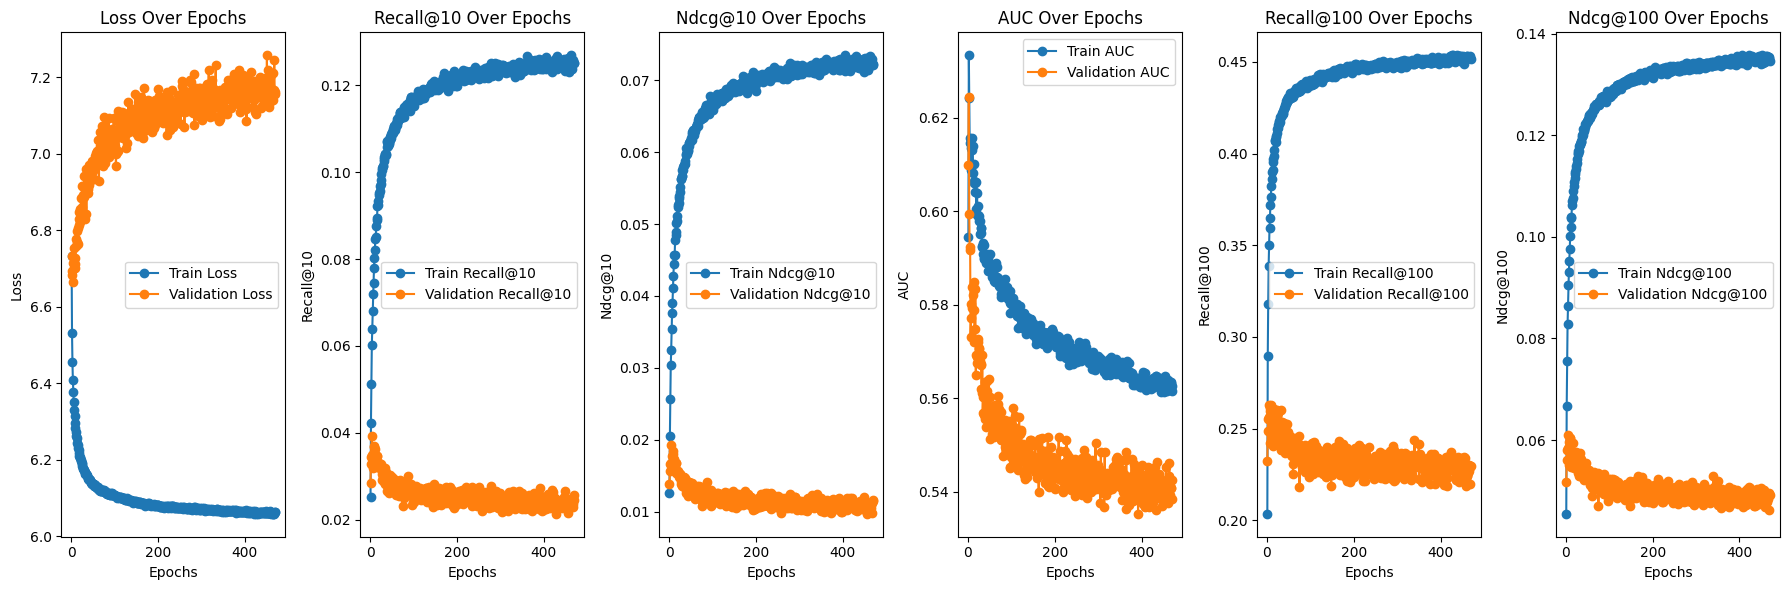

In [205]:
_history = merge_model_history(*history_v6)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': AUC_TERM, **METRIC_AT})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

#### eval

In [202]:
(model_v6.evaluate(train, batch_size=2048, return_dict=True),
 model_v6.evaluate(valid, batch_size=2048, return_dict=True))

8/8 [==============================] - 1s 67ms/step - loss: 7.8267 - auc_1: 0.5412 - recall_at_100: 0.1154 - mrr_at_100: 0.0160 - ndcg_at_100: 0.0325 - map_at_100: 0.0160 - precision_at_100: 0.0012 - recall_at_10: 0.0189 - mrr_at_10: 0.0135 - ndcg_at_10: 0.0147 - map_at_10: 0.0135 - precision_at_10: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 7.7669


({'loss': 6.700080394744873,
  'auc_1': 0.5682430267333984,
  'recall_at_100': 0.3293495774269104,
  'mrr_at_100': 0.05181272700428963,
  'ndcg_at_100': 0.1012401133775711,
  'map_at_100': 0.05181272700428963,
  'precision_at_100': 0.0032934960909187794,
  'recall_at_10': 0.09485484659671783,
  'mrr_at_10': 0.04466599225997925,
  'ndcg_at_10': 0.056328222155570984,
  'map_at_10': 0.04466599225997925,
  'precision_at_10': 0.009485485032200813,
  'regularization_loss': 0.0,
  'loss_batch': 5.2341084480285645},
 {'loss': 7.826672554016113,
  'auc_1': 0.5411800742149353,
  'recall_at_100': 0.1277918964624405,
  'mrr_at_100': 0.014863023534417152,
  'ndcg_at_100': 0.033614836633205414,
  'map_at_100': 0.014863023534417152,
  'precision_at_100': 0.00127791881095618,
  'recall_at_10': 0.01932593248784542,
  'mrr_at_10': 0.012057904154062271,
  'ndcg_at_10': 0.013694076798856258,
  'map_at_10': 0.012057904154062271,
  'precision_at_10': 0.0019325934117659926,
  'regularization_loss': 0.0,
  'l

In [203]:
evaluate_model(model_v6, train, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 7s 28ms/step - loss: 1.9425 - auc_8: 0.5159 - recall_at_100: 0.4137 - mrr_at_100: 0.0356 - ndcg_at_100: 0.1015 - map_at_100: 0.0356 - precision_at_100: 0.0041 - regularization_loss: 0.0000e+00 - loss_batch: 1.9470


{'loss': 1.9424570798873901,
 'auc_8': 0.5158571600914001,
 'recall_at_100': 0.4138201177120209,
 'mrr_at_100': 0.03531337156891823,
 'ndcg_at_100': 0.10124052315950394,
 'map_at_100': 0.03531337156891823,
 'precision_at_100': 0.004138200543820858,
 'regularization_loss': 0.0,
 'loss_batch': 2.1623783111572266}

In [204]:
evaluate_model(model_v6, valid, topk=100)

Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 21ms/step - loss: 1.0115 - auc_9: 0.5178 - recall_at_100: 0.1881 - mrr_at_100: 0.0063 - ndcg_at_100: 0.0359 - map_at_100: 0.0063 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0498


{'loss': 1.011527180671692,
 'auc_9': 0.5178156495094299,
 'recall_at_100': 0.19720476865768433,
 'mrr_at_100': 0.006736374460160732,
 'ndcg_at_100': 0.03776293992996216,
 'map_at_100': 0.006736374460160732,
 'precision_at_100': 0.0019720473792403936,
 'regularization_loss': 0.0,
 'loss_batch': 1.4501715898513794}

### model_v7

In [38]:
_tower_dim = (512, 64) # @param

_learning_rate = 0.01 # @param
# _batch_size = 4096 # @param
_batch_size = 2048 * 2 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = 1024 # @param
# _popularity_sampler = True
_validation_freq = 5 # @param


In [39]:
from merlin.models.tf.outputs.sampling.popularity import PopularityBasedSamplerV2
from merlin.models.tf.outputs.sampling.in_batch import InBatchSamplerV2

sampler = [InBatchSamplerV2(_sample_neg)]
model_v7 = build_towers(train.schema, tower_dim=_tower_dim,
                        neg_sampler=sampler)
TOP_K = [100, 10]
model_v7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)
train_evaluation_clbk_v7 = EvaluationCallback(period=5, topk=100, data=train, type_='Train')
valid_evaluation_clbk_v7 = EvaluationCallback(period=5, topk=100, data=valid, type_='Validation')
history_v7 = []

#### model

In [40]:
# %pdb on
history_v7.append(
    model_v7.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs,
                 validation_batch_size=_validation_batch_size, validation_freq=_validation_freq,
                 callbacks=[train_evaluation_clbk_v7, valid_evaluation_clbk_v7], verbose=0)
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 19ms/step - loss: 1.2913 - auc_1: 0.4974 - recall_at_100: 0.2805 - mrr_at_100: 0.0182 - ndcg_at_100: 0.0629 - map_at_100: 0.0182 - precision_at_100: 0.0028 - regularization_loss: 0.0000e+00 - loss_batch: 1.3072


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.2913174629211426, 'auc_1': 0.4974401593208313, 'recall_at_100': 0.280590295791626, 'mrr_at_100': 0.018360938876867294, 'ndcg_at_100': 0.06311113387346268, 'map_at_100': 0.018360938876867294, 'precision_at_100': 0.0028059021569788456, 'regularization_loss': 0.0, 'loss_batch': 2.061347723007202, 'coverage': 0.9788597053171044, 'novelty': 0.020958350002222518}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 22ms/step - loss: 0.9189 - auc_2: 0.4990 - recall_at_100: 0.1901 - mrr_at_100: 0.0098 - ndcg_at_100: 0.0398 - map_at_100: 0.0098 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 0.9829
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9188729524612427, 'auc_2': 0.49904704093933105, 'recall_at_100': 0.1960679441690445, 'mrr_at_100': 0.00999592524021864, 'ndcg_at_100': 0.04096730425953865, 'map_at_100': 0.00999592524021864, 'precision_at_100': 0.0019606794230639935, 'regularization_loss': 0.0, 'loss_batch': 1.6525990962982178, 'coverage': 0.9819754866618601, 'novelty': 0.11098034600447217}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 6s 18ms/step - loss: 1.6280 - auc_3: 0.5088 - recall_at_100: 0.3448 - mrr_at_100: 0.0233 - ndcg_at_100: 0.0785 - map_at_100: 0.0233 - precision_at_100: 0.0034 - regularization_loss: 0.0000e+00 - loss_batch: 1.6481
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.6279692649841309, 'auc_3': 0.5087960958480835, 'recall_at_100': 0.3528389632701874, 'mrr_at_100': 0.024876495823264122, 'ndcg_at_100': 0.08119535446166992, 'map_at_100': 0.024876495823264122, 'precision_at_100': 0.0035283896140754223, 'regularization_loss': 0.0, 'loss_batch': 2.603909492492676, 'coverage': 0.994234465086483, 'novelty': 0.020034843205574915}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 34ms/step - loss: 0.9755 - auc_4: 0.5054 - recall_at_100: 0.1954 - mrr_at_100: 0.0084 - ndcg_at_100: 0.0392 - map_at_100: 0.0084 - precision_at_100: 0.0020 - regularization_loss: 0.0000e+00 - loss_batch: 1.0362
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9755210280418396, 'auc_4': 0.5054335594177246, 'recall_at_100': 0.20302259922027588, 'mrr_at_100': 0.009053624235093594, 'ndcg_at_100': 0.04108472913503647, 'map_at_100': 0.009053624235093594, 'precision_at_100': 0.002030226169154048, 'regularization_loss': 0.0, 'loss_batch': 1.670186996459961, 'coverage': 0.9935111751982696, 'novelty': 0.12202380952380952}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 19ms/step - loss: 1.7142 - auc_5: 0.4923 - recall_at_100: 0.3708 - mrr_at_100: 0.0266 - ndcg_at_100: 0.0858 - map_at_100: 0.0266 - precision_at_100: 0.0037 - regularization_loss: 0.0000e+00 - loss_batch: 1.7362


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.7141754627227783, 'auc_5': 0.49230578541755676, 'recall_at_100': 0.37105780839920044, 'mrr_at_100': 0.027910560369491577, 'ndcg_at_100': 0.08702493458986282, 'map_at_100': 0.027910560369491577, 'precision_at_100': 0.0037105779629200697, 'regularization_loss': 0.0, 'loss_batch': 2.784464120864868, 'coverage': 1.0, 'novelty': 0.02351679593007307}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 5s 32ms/step - loss: 0.9319 - auc_6: 0.4844 - recall_at_100: 0.1861 - mrr_at_100: 0.0071 - ndcg_at_100: 0.0365 - map_at_100: 0.0071 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 0.9941
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9318880438804626, 'auc_6': 0.4843653738498688, 'recall_at_100': 0.19158753752708435, 'mrr_at_100': 0.00770979980006814, 'ndcg_at_100': 0.037949275225400925, 'map_at_100': 0.00770979980006814, 'precision_at_100': 0.0019158754730597138, 'regularization_loss': 0.0, 'loss_batch': 1.6451042890548706, 'coverage': 0.9956741167988464, 'novelty': 0.12967546754675469}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 29ms/step - loss: 1.6977 - auc_7: 0.4908 - recall_at_100: 0.3644 - mrr_at_100: 0.0269 - ndcg_at_100: 0.0851 - map_at_100: 0.0269 - precision_at_100: 0.0036 - regularization_loss: 0.0000e+00 - loss_batch: 1.7201
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.6977063417434692, 'auc_7': 0.49080991744995117, 'recall_at_100': 0.3655736446380615, 'mrr_at_100': 0.028512513265013695, 'ndcg_at_100': 0.08668544143438339, 'map_at_100': 0.028512513265013695, 'precision_at_100': 0.00365573656745255, 'regularization_loss': 0.0, 'loss_batch': 2.7823050022125244, 'coverage': 1.0, 'novelty': 0.028855569155446754}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 22ms/step - loss: 0.9665 - auc_8: 0.4800 - recall_at_100: 0.1911 - mrr_at_100: 0.0074 - ndcg_at_100: 0.0374 - map_at_100: 0.0074 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0283
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9664759635925293, 'auc_8': 0.479982852935791, 'recall_at_100': 0.19586732983589172, 'mrr_at_100': 0.007910744287073612, 'ndcg_at_100': 0.03871360048651695, 'map_at_100': 0.007910744287073612, 'precision_at_100': 0.001958673121407628, 'regularization_loss': 0.0, 'loss_batch': 1.6747139692306519, 'coverage': 0.9971160778658976, 'novelty': 0.1493979721166033}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 19ms/step - loss: 1.9169 - auc_9: 0.5060 - recall_at_100: 0.4099 - mrr_at_100: 0.0312 - ndcg_at_100: 0.0968 - map_at_100: 0.0312 - precision_at_100: 0.0041 - regularization_loss: 0.0000e+00 - loss_batch: 1.9411


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9169203042984009, 'auc_9': 0.5060310363769531, 'recall_at_100': 0.41387709975242615, 'mrr_at_100': 0.03319522365927696, 'ndcg_at_100': 0.09919548034667969, 'map_at_100': 0.03319522365927696, 'precision_at_100': 0.00413877097889781, 'regularization_loss': 0.0, 'loss_batch': 3.090134382247925, 'coverage': 1.0, 'novelty': 0.029920360440397246}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 4s 34ms/step - loss: 0.9403 - auc_10: 0.5007 - recall_at_100: 0.1865 - mrr_at_100: 0.0065 - ndcg_at_100: 0.0358 - map_at_100: 0.0065 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0082
Candidate set rows: 943


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Validation dataset topk evaluation {'loss': 0.940312385559082, 'auc_10': 0.500739574432373, 'recall_at_100': 0.18817707896232605, 'mrr_at_100': 0.007251364644616842, 'ndcg_at_100': 0.03682398796081543, 'map_at_100': 0.007251364644616842, 'precision_at_100': 0.0018817705567926168, 'regularization_loss': 0.0, 'loss_batch': 1.7183581590652466, 'coverage': 0.9942321557317952, 'novelty': 0.14916165770325845}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 6s 30ms/step - loss: 1.9395 - auc_11: 0.4963 - recall_at_100: 0.4114 - mrr_at_100: 0.0337 - ndcg_at_100: 0.0993 - map_at_100: 0.0337 - precision_at_100: 0.0041 - regularization_loss: 0.0000e+00 - loss_batch: 1.9640
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9394906759262085, 'auc_11': 0.49625837802886963, 'recall_at_100': 0.4179225564002991, 'mrr_at_100': 0.03478705510497093, 'ndcg_at_100': 0.1013621985912323, 'map_at_100': 0.03478705510497093, 'precision_at_100': 0.0041792248375713825, 'regularization_loss': 0.0, 'loss_batch': 3.12860107421875, 'coverage': 1.0, 'novelty': 0.030526690621863976}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 23ms/step - loss: 0.9463 - auc_12: 0.4959 - recall_at_100: 0.1827 - mrr_at_100: 0.0069 - ndcg_at_100: 0.0355 - map_at_100: 0.0069 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 1.0077
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9463337063789368, 'auc_12': 0.49589645862579346, 'recall_at_100': 0.1885114312171936, 'mrr_at_100': 0.007359632290899754, 'ndcg_at_100': 0.036992453038692474, 'map_at_100': 0.007359632290899754, 'precision_at_100': 0.00188511423766613, 'regularization_loss': 0.0, 'loss_batch': 1.649699330329895, 'coverage': 0.9956741167988464, 'novelty': 0.15350805795214065}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 27ms/step - loss: 1.9461 - auc_13: 0.4915 - recall_at_100: 0.4130 - mrr_at_100: 0.0334 - ndcg_at_100: 0.0994 - map_at_100: 0.0334 - precision_at_100: 0.0041 - regularization_loss: 0.0000e+00 - loss_batch: 1.9690


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9461008310317993, 'auc_13': 0.49146443605422974, 'recall_at_100': 0.4190906286239624, 'mrr_at_100': 0.03588126599788666, 'ndcg_at_100': 0.102619469165802, 'map_at_100': 0.03588126599788666, 'precision_at_100': 0.0041909050196409225, 'regularization_loss': 0.0, 'loss_batch': 3.054863214492798, 'coverage': 1.0, 'novelty': 0.0332522303325223}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 21ms/step - loss: 0.9448 - auc_14: 0.4853 - recall_at_100: 0.1805 - mrr_at_100: 0.0060 - ndcg_at_100: 0.0343 - map_at_100: 0.0060 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 1.0025


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9447697401046753, 'auc_14': 0.48528164625167847, 'recall_at_100': 0.1859034299850464, 'mrr_at_100': 0.006471684668213129, 'ndcg_at_100': 0.03570197522640228, 'map_at_100': 0.006471684668213129, 'precision_at_100': 0.001859034295193851, 'regularization_loss': 0.0, 'loss_batch': 1.6061265468597412, 'coverage': 0.9978370583994232, 'novelty': 0.16845301893533404}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 6s 19ms/step - loss: 2.0345 - auc_15: 0.4951 - recall_at_100: 0.4354 - mrr_at_100: 0.0358 - ndcg_at_100: 0.1055 - map_at_100: 0.0358 - precision_at_100: 0.0044 - regularization_loss: 0.0000e+00 - loss_batch: 2.0573


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.03448748588562, 'auc_15': 0.4951075613498688, 'recall_at_100': 0.4381783902645111, 'mrr_at_100': 0.037974558770656586, 'ndcg_at_100': 0.10794763267040253, 'map_at_100': 0.037974558770656586, 'precision_at_100': 0.004381782375276089, 'regularization_loss': 0.0, 'loss_batch': 3.1384403705596924, 'coverage': 1.0, 'novelty': 0.033699031554872604}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 4s 22ms/step - loss: 0.9878 - auc_16: 0.4958 - recall_at_100: 0.1890 - mrr_at_100: 0.0064 - ndcg_at_100: 0.0360 - map_at_100: 0.0064 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0391


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9878370761871338, 'auc_16': 0.49576258659362793, 'recall_at_100': 0.19312559068202972, 'mrr_at_100': 0.006641092244535685, 'ndcg_at_100': 0.03697134554386139, 'map_at_100': 0.006641092244535685, 'precision_at_100': 0.0019312556833028793, 'regularization_loss': 0.0, 'loss_batch': 1.5753225088119507, 'coverage': 0.9992790194664743, 'novelty': 0.15385870451949749}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 8s 31ms/step - loss: 2.0974 - auc_17: 0.5065 - recall_at_100: 0.4459 - mrr_at_100: 0.0369 - ndcg_at_100: 0.1083 - map_at_100: 0.0369 - precision_at_100: 0.0045 - regularization_loss: 0.0000e+00 - loss_batch: 2.1199
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.0974342823028564, 'auc_17': 0.5065270662307739, 'recall_at_100': 0.4494886100292206, 'mrr_at_100': 0.03893773630261421, 'ndcg_at_100': 0.1107172891497612, 'map_at_100': 0.03893773630261421, 'precision_at_100': 0.004494885448366404, 'regularization_loss': 0.0, 'loss_batch': 3.188960075378418, 'coverage': 1.0, 'novelty': 0.03315635877782075}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 21ms/step - loss: 0.9147 - auc_18: 0.5082 - recall_at_100: 0.1746 - mrr_at_100: 0.0057 - ndcg_at_100: 0.0331 - map_at_100: 0.0057 - precision_at_100: 0.0017 - regularization_loss: 0.0000e+00 - loss_batch: 0.9785
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9147021770477295, 'auc_18': 0.5082401037216187, 'recall_at_100': 0.17660826444625854, 'mrr_at_100': 0.006126036401838064, 'ndcg_at_100': 0.0338243767619133, 'map_at_100': 0.006126036401838064, 'precision_at_100': 0.0017660825978964567, 'regularization_loss': 0.0, 'loss_batch': 1.6461079120635986, 'coverage': 0.996395097332372, 'novelty': 0.1655838454784899}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 30ms/step - loss: 2.1164 - auc_19: 0.4997 - recall_at_100: 0.4535 - mrr_at_100: 0.0384 - ndcg_at_100: 0.1110 - map_at_100: 0.0384 - precision_at_100: 0.0045 - regularization_loss: 0.0000e+00 - loss_batch: 2.1385


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.1164004802703857, 'auc_19': 0.49972963333129883, 'recall_at_100': 0.45434603095054626, 'mrr_at_100': 0.040132876485586166, 'ndcg_at_100': 0.11272542178630829, 'map_at_100': 0.040132876485586166, 'precision_at_100': 0.004543459974229336, 'regularization_loss': 0.0, 'loss_batch': 3.1894049644470215, 'coverage': 1.0, 'novelty': 0.03743400420785201}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 22ms/step - loss: 0.9449 - auc_20: 0.5026 - recall_at_100: 0.1787 - mrr_at_100: 0.0055 - ndcg_at_100: 0.0336 - map_at_100: 0.0055 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 0.9931
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9449007511138916, 'auc_20': 0.5026285648345947, 'recall_at_100': 0.18229235708713531, 'mrr_at_100': 0.005838606972247362, 'ndcg_at_100': 0.03448597341775894, 'map_at_100': 0.005838606972247362, 'precision_at_100': 0.0018229236593469977, 'regularization_loss': 0.0, 'loss_batch': 1.4976565837860107, 'coverage': 0.996395097332372, 'novelty': 0.17070963070238956}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


#### analysis

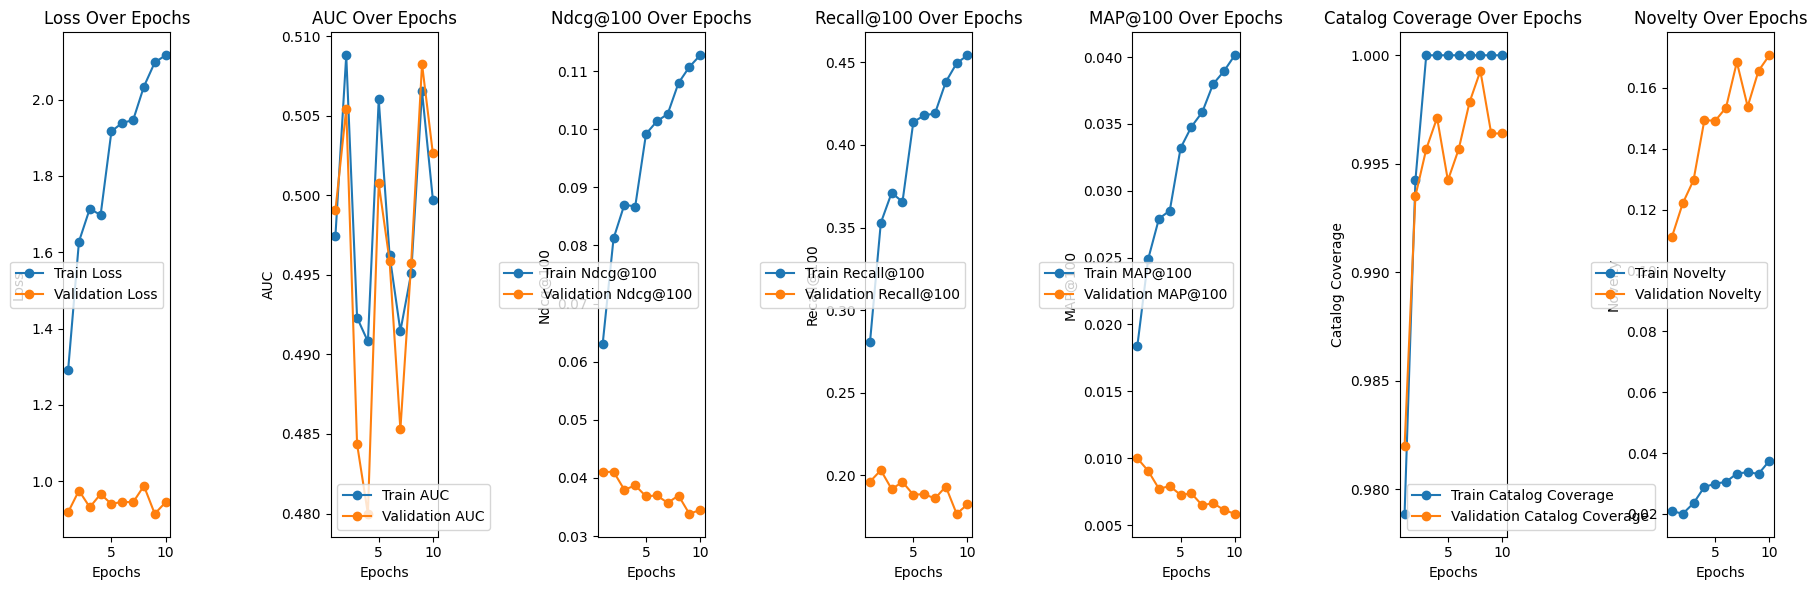

In [41]:
_history = train_evaluation_clbk_v7.get_records()
_history_val = valid_evaluation_clbk_v7.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]

_metrics = default_plot_metrics = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
plot_metrics(_history, _history_val, _metrics)


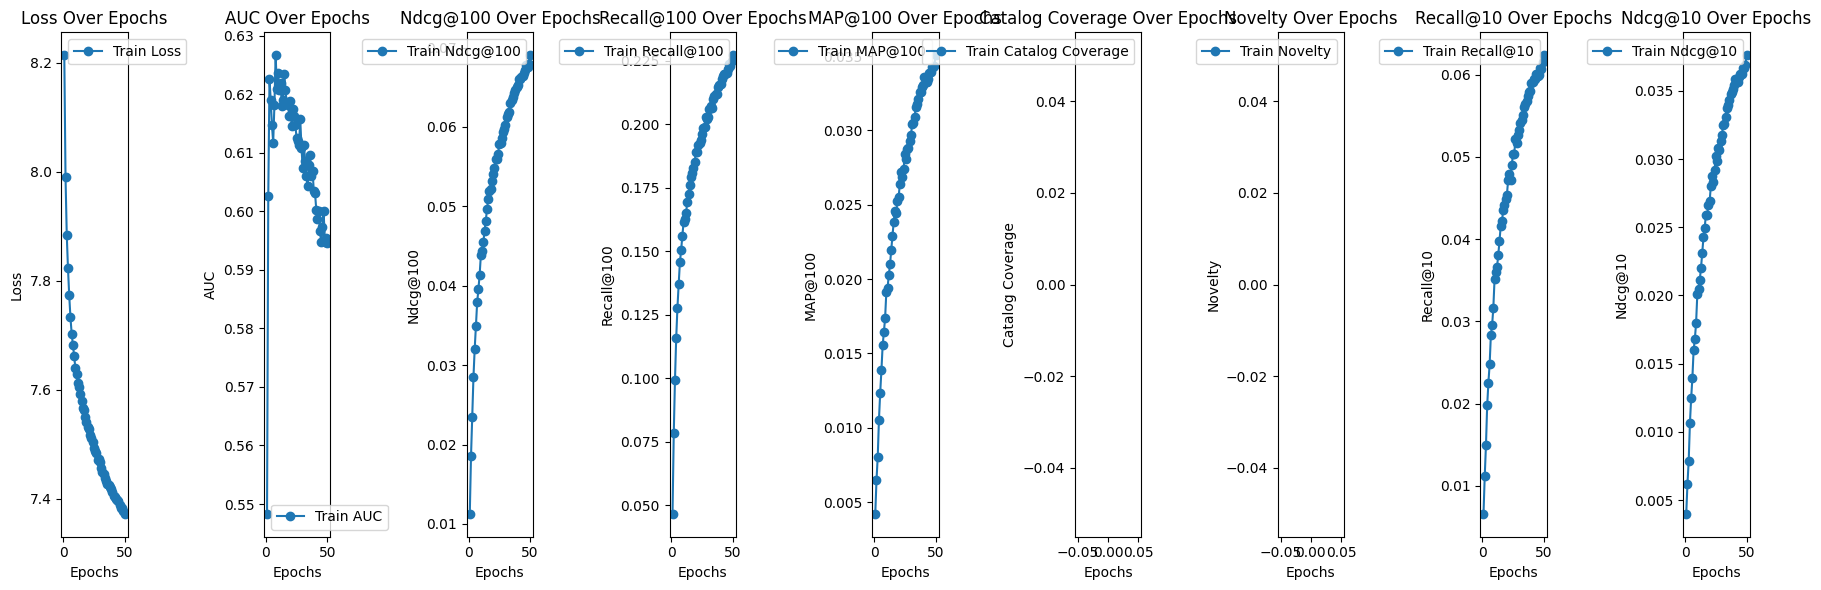

In [43]:
_history = merge_model_history(*history_v7)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, None, default_plot_metrics | {'AUC': AUC_TERM, **METRIC_AT})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

#### eval

In [39]:
(model_v7.evaluate(train, batch_size=2048, return_dict=True),
 model_v7.evaluate(valid, batch_size=2048, return_dict=True))

8/8 [==============================] - 1s 43ms/step - loss: 7.4902 - auc: 0.5324 - recall_at_100: 0.1308 - mrr_at_100: 0.0199 - ndcg_at_100: 0.0385 - map_at_100: 0.0199 - precision_at_100: 0.0013 - recall_at_10: 0.0255 - mrr_at_10: 0.0172 - ndcg_at_10: 0.0191 - map_at_10: 0.0172 - precision_at_10: 0.0026 - regularization_loss: 0.0000e+00 - loss_batch: 7.3161


({'loss': 7.001859188079834,
  'auc': 0.5533164739608765,
  'recall_at_100': 0.2375573366880417,
  'mrr_at_100': 0.026235397905111313,
  'ndcg_at_100': 0.06303759664297104,
  'map_at_100': 0.026235397905111313,
  'precision_at_100': 0.0023755731526762247,
  'recall_at_10': 0.050924476236104965,
  'mrr_at_10': 0.02084735967218876,
  'ndcg_at_10': 0.02779472805559635,
  'map_at_10': 0.02084735967218876,
  'precision_at_10': 0.005092448089271784,
  'regularization_loss': 0.0,
  'loss_batch': 5.494177341461182},
 {'loss': 7.490218639373779,
  'auc': 0.53240567445755,
  'recall_at_100': 0.14517854154109955,
  'mrr_at_100': 0.01891111582517624,
  'ndcg_at_100': 0.04009773209691048,
  'map_at_100': 0.01891111582517624,
  'precision_at_100': 0.0014517854433506727,
  'recall_at_10': 0.02581249177455902,
  'mrr_at_10': 0.01577894389629364,
  'ndcg_at_10': 0.01807868666946888,
  'map_at_10': 0.01577894389629364,
  'precision_at_10': 0.002581248991191387,
  'regularization_loss': 0.0,
  'loss_batc

In [40]:
evaluate_model(model_v7, train, topk=100)

Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 9s 33ms/step - loss: 1.2987 - auc_1: 0.4858 - recall_at_100: 0.2791 - mrr_at_100: 0.0158 - ndcg_at_100: 0.0600 - map_at_100: 0.0158 - precision_at_100: 0.0028 - regularization_loss: 0.0000e+00 - loss_batch: 1.3059


{'loss': 1.2987439632415771,
 'auc_1': 0.4857749938964844,
 'recall_at_100': 0.2779693007469177,
 'mrr_at_100': 0.015677135437726974,
 'ndcg_at_100': 0.05984402820467949,
 'map_at_100': 0.015677135437726974,
 'precision_at_100': 0.002779693342745304,
 'regularization_loss': 0.0,
 'loss_batch': 1.6457003355026245}

In [41]:
evaluate_model(model_v7, valid, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 32ms/step - loss: 0.9228 - auc_2: 0.4851 - recall_at_100: 0.1839 - mrr_at_100: 0.0074 - ndcg_at_100: 0.0362 - map_at_100: 0.0074 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 0.9948


{'loss': 0.9228459000587463,
 'auc_2': 0.4850970506668091,
 'recall_at_100': 0.19272436201572418,
 'mrr_at_100': 0.00798935629427433,
 'ndcg_at_100': 0.03828347846865654,
 'map_at_100': 0.00798935629427433,
 'precision_at_100': 0.001927243429236114,
 'regularization_loss': 0.0,
 'loss_batch': 1.7468805313110352}

### model_v8

In [46]:
# _tower_dim = (64, 128) # @param
# _tower_dim = (128, 64) # @param
_tower_dim = [64, 64] # @param

_learning_rate = 0.01 # @param
# _batch_size = 4096 # @param
_batch_size = 1024 * 2 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = 1024 # @param
# _popularity_sampler = True
_validation_freq = 5 # @param

embedding_dims = {
    'item': {
        'movie_id': 64,
        'genres': 8*2
    },
    'user': {
        'user_id': 64,
        'gender': 8,
        'occupation': 8*2
    }
}

In [47]:
from merlin.models.tf.outputs.sampling.popularity import PopularityBasedSamplerV2
from merlin.models.tf.outputs.sampling.in_batch import InBatchSamplerV2


sampler = [InBatchSamplerV2(_sample_neg)]

###
model_v8 = model = build_towers(train.schema, tower_dim=_tower_dim,
                        neg_sampler=sampler, embedding_dims=embedding_dims)
train_evaluation_clbk_v8 = EvaluationCallback(period=5, topk=100, data=train, type_='Train')
valid_evaluation_clbk_v8 = EvaluationCallback(period=5, topk=100, data=valid, type_='Validation')
history_v8 = []
###

TOP_K = [100, 50, 25, 10]
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)



In [51]:
VERSION = 'v8'

#### model

In [ ]:
history = globals()[f'history_{VERSION}']
model = globals()[f'model_{VERSION}']
train_evaluation_clbk = globals()[f'train_evaluation_clbk_{VERSION}']
valid_evaluation_clbk = globals()[f'valid_evaluation_clbk_{VERSION}']

In [48]:
# %pdb on
# _epochs = 10
history.append(
    model.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs,
                 validation_batch_size=_validation_batch_size, validation_freq=_validation_freq,
                 callbacks=[train_evaluation_clbk,
                            valid_evaluation_clbk],
                  verbose=1)
)

Epoch 1/50
35/35 [==============================] - 30s 434ms/step - loss: 7.3520 - auc_21: 0.5984 - recall_at_100: 0.1000 - mrr_at_100: 0.0069 - ndcg_at_100: 0.0227 - map_at_100: 0.0069 - precision_at_100: 9.9994e-04 - recall_at_10: 0.0136 - mrr_at_10: 0.0046 - ndcg_at_10: 0.0067 - map_at_10: 0.0046 - precision_at_10: 0.0014 - regularization_loss: 0.0000e+00 - loss_batch: 7.2823
Epoch 2/50
35/35 [==============================] - 12s 307ms/step - loss: 7.1127 - auc_21: 0.6510 - recall_at_100: 0.1976 - mrr_at_100: 0.0187 - ndcg_at_100: 0.0496 - map_at_100: 0.0187 - precision_at_100: 0.0020 - recall_at_10: 0.0378 - mrr_at_10: 0.0142 - ndcg_at_10: 0.0196 - map_at_10: 0.0142 - precision_at_10: 0.0038 - regularization_loss: 0.0000e+00 - loss_batch: 7.0459
Epoch 3/50
35/35 [==============================] - 7s 162ms/step - loss: 7.0420 - auc_21: 0.6398 - recall_at_100: 0.2288 - mrr_at_100: 0.0238 - ndcg_at_100: 0.0593 - map_at_100: 0.0238 - precision_at_100: 0.0023 - recall_at_10: 0.0457 - 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 4s 18ms/step - loss: 1.5116 - auc_22: 0.5070 - recall_at_100: 0.3256 - mrr_at_100: 0.0220 - ndcg_at_100: 0.0738 - map_at_100: 0.0220 - precision_at_100: 0.0033 - regularization_loss: 0.0000e+00 - loss_batch: 1.5220
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.5116006135940552, 'auc_22': 0.5070141553878784, 'recall_at_100': 0.3259308934211731, 'mrr_at_100': 0.022009266540408134, 'ndcg_at_100': 0.07386606186628342, 'map_at_100': 0.022009266540408134, 'precision_at_100': 0.0032593088690191507, 'regularization_loss': 0.0, 'loss_batch': 2.014418840408325, 'coverage': 1.0, 'novelty': 0.03440475756138495}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 31ms/step - loss: 0.9036 - auc_23: 0.5123 - recall_at_100: 0.1865 - mrr_at_100: 0.0069 - ndcg_at_100: 0.0364 - map_at_100: 0.0069 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 0.9598
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9035792350769043, 'auc_23': 0.5123141407966614, 'recall_at_100': 0.1885114312171936, 'mrr_at_100': 0.00767479045316577, 'ndcg_at_100': 0.037433795630931854, 'map_at_100': 0.00767479045316577, 'precision_at_100': 0.001885114354081452, 'regularization_loss': 0.0, 'loss_batch': 1.5472538471221924, 'coverage': 0.9913482335976929, 'novelty': 0.1648889666025529}
35/35 [==============================] - 131s 4s/step - loss: 6.9648 - auc_21: 0.6241 - recall_at_100: 0.2550 - mrr_at_100: 0.0294 - ndcg_at_100: 0.0688 - map_at_100: 0.0294 - precision_at_100: 0.0026 - recall_at_10: 0.0569 - mrr_at_10: 0.0238 - ndcg_at_10: 0.0315 - map_at_10: 0.0238 - precision_at_10: 0.0057 - re

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 8s 129ms/step - loss: 6.9422 - auc_21: 0.6183 - recall_at_100: 0.2646 - mrr_at_100: 0.0312 - ndcg_at_100: 0.0719 - map_at_100: 0.0312 - precision_at_100: 0.0026 - recall_at_10: 0.0589 - mrr_at_10: 0.0252 - ndcg_at_10: 0.0330 - map_at_10: 0.0252 - precision_at_10: 0.0059 - regularization_loss: 0.0000e+00 - loss_batch: 6.8657
Epoch 7/50
35/35 [==============================] - 6s 120ms/step - loss: 6.9202 - auc_21: 0.6240 - recall_at_100: 0.2684 - mrr_at_100: 0.0348 - ndcg_at_100: 0.0757 - map_at_100: 0.0348 - precision_at_100: 0.0027 - recall_at_10: 0.0647 - mrr_at_10: 0.0288 - ndcg_at_10: 0.0371 - map_at_10: 0.0288 - precision_at_10: 0.0065 - regularization_loss: 0.0000e+00 - loss_batch: 6.8431
Epoch 8/50
35/35 [==============================] - 7s 163ms/step - loss: 6.9027 - auc_21: 0.6189 - recall_at_100: 0.2756 - mrr_at_100: 0.0358 - ndcg_at_100: 0.0778 - map_at_100: 0.0358 - precision_at_100: 0.0028 - recall_at_10: 0.0662 - mrr_at_10: 0.0297

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 19ms/step - loss: 1.6451 - auc_24: 0.5085 - recall_at_100: 0.3505 - mrr_at_100: 0.0264 - ndcg_at_100: 0.0821 - map_at_100: 0.0264 - precision_at_100: 0.0035 - regularization_loss: 0.0000e+00 - loss_batch: 1.6556
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.6451122760772705, 'auc_24': 0.5085394382476807, 'recall_at_100': 0.3546765148639679, 'mrr_at_100': 0.02739264816045761, 'ndcg_at_100': 0.0837821289896965, 'map_at_100': 0.02739264816045761, 'precision_at_100': 0.003546764375641942, 'regularization_loss': 0.0, 'loss_batch': 2.152517795562744, 'coverage': 1.0, 'novelty': 0.03680430879712747}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 33ms/step - loss: 0.9537 - auc_25: 0.5058 - recall_at_100: 0.1900 - mrr_at_100: 0.0068 - ndcg_at_100: 0.0367 - map_at_100: 0.0068 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0162
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9537121057510376, 'auc_25': 0.5057981014251709, 'recall_at_100': 0.1947305053472519, 'mrr_at_100': 0.007474774494767189, 'ndcg_at_100': 0.03820737823843956, 'map_at_100': 0.007474774494767189, 'precision_at_100': 0.0019473048159852624, 'regularization_loss': 0.0, 'loss_batch': 1.6698997020721436, 'coverage': 0.9913482335976929, 'novelty': 0.17735565168328005}
35/35 [==============================] - 126s 4s/step - loss: 6.8790 - auc_21: 0.6180 - recall_at_100: 0.2829 - mrr_at_100: 0.0377 - ndcg_at_100: 0.0808 - map_at_100: 0.0377 - precision_at_100: 0.0028 - recall_at_10: 0.0702 - mrr_at_10: 0.0315 - ndcg_at_10: 0.0404 - map_at_10: 0.0315 - precision_at_10: 0.0070 -

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 7s 126ms/step - loss: 6.8689 - auc_21: 0.6117 - recall_at_100: 0.2845 - mrr_at_100: 0.0377 - ndcg_at_100: 0.0811 - map_at_100: 0.0377 - precision_at_100: 0.0028 - recall_at_10: 0.0717 - mrr_at_10: 0.0315 - ndcg_at_10: 0.0408 - map_at_10: 0.0315 - precision_at_10: 0.0072 - regularization_loss: 0.0000e+00 - loss_batch: 6.7871
Epoch 12/50
35/35 [==============================] - 4s 74ms/step - loss: 6.8633 - auc_21: 0.6126 - recall_at_100: 0.2850 - mrr_at_100: 0.0372 - ndcg_at_100: 0.0808 - map_at_100: 0.0372 - precision_at_100: 0.0028 - recall_at_10: 0.0696 - mrr_at_10: 0.0308 - ndcg_at_10: 0.0398 - map_at_10: 0.0308 - precision_at_10: 0.0070 - regularization_loss: 0.0000e+00 - loss_batch: 6.7785
Epoch 13/50
35/35 [==============================] - 4s 63ms/step - loss: 6.8504 - auc_21: 0.6081 - recall_at_100: 0.2875 - mrr_at_100: 0.0397 - ndcg_at_100: 0.0835 - map_at_100: 0.0397 - precision_at_100: 0.0029 - recall_at_10: 0.0750 - mrr_at_10: 0.0334

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 6s 19ms/step - loss: 1.7583 - auc_26: 0.5093 - recall_at_100: 0.3765 - mrr_at_100: 0.0298 - ndcg_at_100: 0.0898 - map_at_100: 0.0298 - precision_at_100: 0.0038 - regularization_loss: 0.0000e+00 - loss_batch: 1.7703


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.7583270072937012, 'auc_26': 0.5092954635620117, 'recall_at_100': 0.3779379427433014, 'mrr_at_100': 0.029824675992131233, 'ndcg_at_100': 0.090074323117733, 'map_at_100': 0.029824675992131233, 'precision_at_100': 0.003779380116611719, 'regularization_loss': 0.0, 'loss_batch': 2.3410439491271973, 'coverage': 1.0, 'novelty': 0.03744589604098003}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 21ms/step - loss: 0.9465 - auc_27: 0.5123 - recall_at_100: 0.1838 - mrr_at_100: 0.0073 - ndcg_at_100: 0.0362 - map_at_100: 0.0073 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 1.0038
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9465305209159851, 'auc_27': 0.5122783780097961, 'recall_at_100': 0.19098569452762604, 'mrr_at_100': 0.007221198175102472, 'ndcg_at_100': 0.037295110523700714, 'map_at_100': 0.007221198175102472, 'precision_at_100': 0.001909857033751905, 'regularization_loss': 0.0, 'loss_batch': 1.6030991077423096, 'coverage': 0.9935111751982696, 'novelty': 0.17599850690556176}
35/35 [==============================] - 129s 4s/step - loss: 6.8397 - auc_21: 0.5998 - recall_at_100: 0.2961 - mrr_at_100: 0.0405 - ndcg_at_100: 0.0855 - map_at_100: 0.0405 - precision_at_100: 0.0030 - recall_at_10: 0.0751 - mrr_at_10: 0.0340 - ndcg_at_10: 0.0435 - map_at_10: 0.0340 - precision_at_10: 0.0075 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 7s 116ms/step - loss: 6.8286 - auc_21: 0.6030 - recall_at_100: 0.2986 - mrr_at_100: 0.0402 - ndcg_at_100: 0.0857 - map_at_100: 0.0402 - precision_at_100: 0.0030 - recall_at_10: 0.0747 - mrr_at_10: 0.0336 - ndcg_at_10: 0.0431 - map_at_10: 0.0336 - precision_at_10: 0.0075 - regularization_loss: 0.0000e+00 - loss_batch: 6.7433
Epoch 17/50
35/35 [==============================] - 4s 68ms/step - loss: 6.8203 - auc_21: 0.6007 - recall_at_100: 0.2987 - mrr_at_100: 0.0410 - ndcg_at_100: 0.0864 - map_at_100: 0.0410 - precision_at_100: 0.0030 - recall_at_10: 0.0762 - mrr_at_10: 0.0344 - ndcg_at_10: 0.0441 - map_at_10: 0.0344 - precision_at_10: 0.0076 - regularization_loss: 0.0000e+00 - loss_batch: 6.7344
Epoch 18/50
35/35 [==============================] - 4s 65ms/step - loss: 6.8166 - auc_21: 0.5981 - recall_at_100: 0.3004 - mrr_at_100: 0.0419 - ndcg_at_100: 0.0875 - map_at_100: 0.0419 - precision_at_100: 0.0030 - recall_at_10: 0.0774 - mrr_at_10: 0.0352

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 4s 18ms/step - loss: 1.9290 - auc_28: 0.5034 - recall_at_100: 0.4166 - mrr_at_100: 0.0334 - ndcg_at_100: 0.1000 - map_at_100: 0.0334 - precision_at_100: 0.0042 - regularization_loss: 0.0000e+00 - loss_batch: 1.9414
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9290146827697754, 'auc_28': 0.5033977031707764, 'recall_at_100': 0.41712486743927, 'mrr_at_100': 0.03423711284995079, 'ndcg_at_100': 0.10082338750362396, 'map_at_100': 0.03423711284995079, 'precision_at_100': 0.004171248525381088, 'regularization_loss': 0.0, 'loss_batch': 2.5279910564422607, 'coverage': 1.0, 'novelty': 0.03482660560623407}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 23ms/step - loss: 0.9548 - auc_29: 0.5068 - recall_at_100: 0.1881 - mrr_at_100: 0.0065 - ndcg_at_100: 0.0361 - map_at_100: 0.0065 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0078
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9548147320747375, 'auc_29': 0.5068019032478333, 'recall_at_100': 0.19152066111564636, 'mrr_at_100': 0.0067821163684129715, 'ndcg_at_100': 0.03699124976992607, 'map_at_100': 0.0067821163684129715, 'precision_at_100': 0.0019152065506204963, 'regularization_loss': 0.0, 'loss_batch': 1.5615403652191162, 'coverage': 0.9913482335976929, 'novelty': 0.16491780342777196}
35/35 [==============================] - 132s 4s/step - loss: 6.8047 - auc_21: 0.5975 - recall_at_100: 0.3062 - mrr_at_100: 0.0421 - ndcg_at_100: 0.0887 - map_at_100: 0.0421 - precision_at_100: 0.0031 - recall_at_10: 0.0782 - mrr_at_10: 0.0354 - ndcg_at_10: 0.0453 - map_at_10: 0.0354 - precision_at_10: 0.007

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 4s 64ms/step - loss: 6.7998 - auc_21: 0.5968 - recall_at_100: 0.3095 - mrr_at_100: 0.0435 - ndcg_at_100: 0.0904 - map_at_100: 0.0435 - precision_at_100: 0.0031 - recall_at_10: 0.0801 - mrr_at_10: 0.0367 - ndcg_at_10: 0.0468 - map_at_10: 0.0367 - precision_at_10: 0.0080 - regularization_loss: 0.0000e+00 - loss_batch: 6.7121
Epoch 22/50
35/35 [==============================] - 4s 69ms/step - loss: 6.7963 - auc_21: 0.5992 - recall_at_100: 0.3057 - mrr_at_100: 0.0436 - ndcg_at_100: 0.0899 - map_at_100: 0.0436 - precision_at_100: 0.0031 - recall_at_10: 0.0819 - mrr_at_10: 0.0371 - ndcg_at_10: 0.0475 - map_at_10: 0.0371 - precision_at_10: 0.0082 - regularization_loss: 0.0000e+00 - loss_batch: 6.7087
Epoch 23/50
35/35 [==============================] - 6s 76ms/step - loss: 6.7946 - auc_21: 0.5938 - recall_at_100: 0.3053 - mrr_at_100: 0.0438 - ndcg_at_100: 0.0900 - map_at_100: 0.0438 - precision_at_100: 0.0031 - recall_at_10: 0.0803 - mrr_at_10: 0.0371 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 18ms/step - loss: 1.8927 - auc_30: 0.5116 - recall_at_100: 0.4071 - mrr_at_100: 0.0335 - ndcg_at_100: 0.0983 - map_at_100: 0.0335 - precision_at_100: 0.0041 - regularization_loss: 0.0000e+00 - loss_batch: 1.9050


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.8926770687103271, 'auc_30': 0.5115947127342224, 'recall_at_100': 0.4073815643787384, 'mrr_at_100': 0.03420222923159599, 'ndcg_at_100': 0.09905974566936493, 'map_at_100': 0.03420222923159599, 'precision_at_100': 0.004073815420269966, 'regularization_loss': 0.0, 'loss_batch': 2.492418050765991, 'coverage': 1.0, 'novelty': 0.03801652892561983}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 29ms/step - loss: 0.9608 - auc_31: 0.5111 - recall_at_100: 0.1847 - mrr_at_100: 0.0064 - ndcg_at_100: 0.0355 - map_at_100: 0.0064 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 1.0185
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9607767462730408, 'auc_31': 0.511059045791626, 'recall_at_100': 0.19085194170475006, 'mrr_at_100': 0.006715768948197365, 'ndcg_at_100': 0.036788418889045715, 'map_at_100': 0.006715768948197365, 'precision_at_100': 0.0019085195381194353, 'regularization_loss': 0.0, 'loss_batch': 1.6222213506698608, 'coverage': 0.992790194664744, 'novelty': 0.18479325886733294}
35/35 [==============================] - 127s 4s/step - loss: 6.7893 - auc_21: 0.5921 - recall_at_100: 0.3096 - mrr_at_100: 0.0446 - ndcg_at_100: 0.0915 - map_at_100: 0.0446 - precision_at_100: 0.0031 - recall_at_10: 0.0823 - mrr_at_10: 0.0377 - ndcg_at_10: 0.0481 - map_at_10: 0.0377 - precision_at_10: 0.0082 -

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 6s 86ms/step - loss: 6.7828 - auc_21: 0.5862 - recall_at_100: 0.3117 - mrr_at_100: 0.0445 - ndcg_at_100: 0.0917 - map_at_100: 0.0445 - precision_at_100: 0.0031 - recall_at_10: 0.0818 - mrr_at_10: 0.0376 - ndcg_at_10: 0.0479 - map_at_10: 0.0376 - precision_at_10: 0.0082 - regularization_loss: 0.0000e+00 - loss_batch: 6.6931
Epoch 27/50
35/35 [==============================] - 3s 52ms/step - loss: 6.7782 - auc_21: 0.5932 - recall_at_100: 0.3125 - mrr_at_100: 0.0438 - ndcg_at_100: 0.0914 - map_at_100: 0.0438 - precision_at_100: 0.0031 - recall_at_10: 0.0835 - mrr_at_10: 0.0370 - ndcg_at_10: 0.0478 - map_at_10: 0.0370 - precision_at_10: 0.0084 - regularization_loss: 0.0000e+00 - loss_batch: 6.6880
Epoch 28/50
35/35 [==============================] - 3s 45ms/step - loss: 6.7762 - auc_21: 0.5932 - recall_at_100: 0.3145 - mrr_at_100: 0.0455 - ndcg_at_100: 0.0931 - map_at_100: 0.0455 - precision_at_100: 0.0031 - recall_at_10: 0.0830 - mrr_at_10: 0.0385 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 7s 28ms/step - loss: 1.9399 - auc_32: 0.5027 - recall_at_100: 0.4146 - mrr_at_100: 0.0339 - ndcg_at_100: 0.0999 - map_at_100: 0.0339 - precision_at_100: 0.0041 - regularization_loss: 0.0000e+00 - loss_batch: 1.9536


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9398921728134155, 'auc_32': 0.5026826858520508, 'recall_at_100': 0.41501668095588684, 'mrr_at_100': 0.034590236842632294, 'ndcg_at_100': 0.10067110508680344, 'map_at_100': 0.034590236842632294, 'precision_at_100': 0.004150167107582092, 'regularization_loss': 0.0, 'loss_batch': 2.6043999195098877, 'coverage': 1.0, 'novelty': 0.04227562090917242}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 22ms/step - loss: 0.9434 - auc_33: 0.4859 - recall_at_100: 0.1815 - mrr_at_100: 0.0060 - ndcg_at_100: 0.0345 - map_at_100: 0.0060 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 1.0010
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9433610439300537, 'auc_33': 0.4859168529510498, 'recall_at_100': 0.18536846339702606, 'mrr_at_100': 0.006318386644124985, 'ndcg_at_100': 0.035491205751895905, 'map_at_100': 0.006318386644124985, 'precision_at_100': 0.0018536846619099379, 'regularization_loss': 0.0, 'loss_batch': 1.6035887002944946, 'coverage': 0.9920692141312184, 'novelty': 0.1790053151100987}
35/35 [==============================] - 128s 4s/step - loss: 6.7659 - auc_21: 0.5908 - recall_at_100: 0.3158 - mrr_at_100: 0.0453 - ndcg_at_100: 0.0932 - map_at_100: 0.0453 - precision_at_100: 0.0032 - recall_at_10: 0.0840 - mrr_at_10: 0.0383 - ndcg_at_10: 0.0490 - map_at_10: 0.0383 - precision_at_10: 0.0084 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 3s 53ms/step - loss: 6.7657 - auc_21: 0.5881 - recall_at_100: 0.3179 - mrr_at_100: 0.0457 - ndcg_at_100: 0.0937 - map_at_100: 0.0457 - precision_at_100: 0.0032 - recall_at_10: 0.0847 - mrr_at_10: 0.0388 - ndcg_at_10: 0.0494 - map_at_10: 0.0388 - precision_at_10: 0.0085 - regularization_loss: 0.0000e+00 - loss_batch: 6.6744
Epoch 32/50
35/35 [==============================] - 4s 71ms/step - loss: 6.7626 - auc_21: 0.5868 - recall_at_100: 0.3151 - mrr_at_100: 0.0461 - ndcg_at_100: 0.0939 - map_at_100: 0.0461 - precision_at_100: 0.0032 - recall_at_10: 0.0864 - mrr_at_10: 0.0392 - ndcg_at_10: 0.0502 - map_at_10: 0.0392 - precision_at_10: 0.0086 - regularization_loss: 0.0000e+00 - loss_batch: 6.6719
Epoch 33/50
35/35 [==============================] - 5s 57ms/step - loss: 6.7613 - auc_21: 0.5872 - recall_at_100: 0.3151 - mrr_at_100: 0.0460 - ndcg_at_100: 0.0937 - map_at_100: 0.0460 - precision_at_100: 0.0032 - recall_at_10: 0.0849 - mrr_at_10: 0.0390 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 17ms/step - loss: 1.9267 - auc_34: 0.5057 - recall_at_100: 0.4110 - mrr_at_100: 0.0348 - ndcg_at_100: 0.1003 - map_at_100: 0.0348 - precision_at_100: 0.0041 - regularization_loss: 0.0000e+00 - loss_batch: 1.9413


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9266728162765503, 'auc_34': 0.505723237991333, 'recall_at_100': 0.41282299160957336, 'mrr_at_100': 0.035479798913002014, 'ndcg_at_100': 0.10122715681791306, 'map_at_100': 0.035479798913002014, 'precision_at_100': 0.004128230269998312, 'regularization_loss': 0.0, 'loss_batch': 2.6365458965301514, 'coverage': 1.0, 'novelty': 0.04329063948951017}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 4s 22ms/step - loss: 0.8927 - auc_35: 0.5024 - recall_at_100: 0.1663 - mrr_at_100: 0.0052 - ndcg_at_100: 0.0312 - map_at_100: 0.0052 - precision_at_100: 0.0017 - regularization_loss: 0.0000e+00 - loss_batch: 0.9556
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.8927199840545654, 'auc_35': 0.5023886561393738, 'recall_at_100': 0.17326468229293823, 'mrr_at_100': 0.005751166958361864, 'ndcg_at_100': 0.032966867089271545, 'map_at_100': 0.005751166958361864, 'precision_at_100': 0.0017326467204838991, 'regularization_loss': 0.0, 'loss_batch': 1.6129415035247803, 'coverage': 0.9942321557317952, 'novelty': 0.19120032441200324}
35/35 [==============================] - 136s 4s/step - loss: 6.7566 - auc_21: 0.5865 - recall_at_100: 0.3153 - mrr_at_100: 0.0465 - ndcg_at_100: 0.0942 - map_at_100: 0.0465 - precision_at_100: 0.0032 - recall_at_10: 0.0860 - mrr_at_10: 0.0395 - ndcg_at_10: 0.0503 - map_at_10: 0.0395 - precision_at_10: 0.0086

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 3s 58ms/step - loss: 6.7502 - auc_21: 0.5839 - recall_at_100: 0.3200 - mrr_at_100: 0.0465 - ndcg_at_100: 0.0949 - map_at_100: 0.0465 - precision_at_100: 0.0032 - recall_at_10: 0.0850 - mrr_at_10: 0.0395 - ndcg_at_10: 0.0500 - map_at_10: 0.0395 - precision_at_10: 0.0085 - regularization_loss: 0.0000e+00 - loss_batch: 6.6584
Epoch 37/50
35/35 [==============================] - 3s 51ms/step - loss: 6.7465 - auc_21: 0.5828 - recall_at_100: 0.3246 - mrr_at_100: 0.0472 - ndcg_at_100: 0.0963 - map_at_100: 0.0472 - precision_at_100: 0.0032 - recall_at_10: 0.0872 - mrr_at_10: 0.0400 - ndcg_at_10: 0.0510 - map_at_10: 0.0400 - precision_at_10: 0.0087 - regularization_loss: 0.0000e+00 - loss_batch: 6.6546
Epoch 38/50
35/35 [==============================] - 5s 75ms/step - loss: 6.7444 - auc_21: 0.5804 - recall_at_100: 0.3247 - mrr_at_100: 0.0486 - ndcg_at_100: 0.0974 - map_at_100: 0.0486 - precision_at_100: 0.0032 - recall_at_10: 0.0889 - mrr_at_10: 0.0416 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 20ms/step - loss: 1.9801 - auc_36: 0.5118 - recall_at_100: 0.4202 - mrr_at_100: 0.0357 - ndcg_at_100: 0.1028 - map_at_100: 0.0357 - precision_at_100: 0.0042 - regularization_loss: 0.0000e+00 - loss_batch: 1.9927
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9800550937652588, 'auc_36': 0.5118247270584106, 'recall_at_100': 0.42420443892478943, 'mrr_at_100': 0.03677788004279137, 'ndcg_at_100': 0.10451055318117142, 'map_at_100': 0.03677788004279137, 'precision_at_100': 0.004242044407874346, 'regularization_loss': 0.0, 'loss_batch': 2.593754291534424, 'coverage': 1.0, 'novelty': 0.04012595208714523}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 22ms/step - loss: 0.9635 - auc_37: 0.5163 - recall_at_100: 0.1828 - mrr_at_100: 0.0061 - ndcg_at_100: 0.0349 - map_at_100: 0.0061 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 1.0128
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9635147452354431, 'auc_37': 0.5163277983665466, 'recall_at_100': 0.1885114312171936, 'mrr_at_100': 0.006231995765119791, 'ndcg_at_100': 0.03595578670501709, 'map_at_100': 0.006231995765119791, 'precision_at_100': 0.001885114354081452, 'regularization_loss': 0.0, 'loss_batch': 1.5277540683746338, 'coverage': 0.9942321557317952, 'novelty': 0.17695627697504224}
35/35 [==============================] - 128s 4s/step - loss: 6.7370 - auc_21: 0.5840 - recall_at_100: 0.3246 - mrr_at_100: 0.0471 - ndcg_at_100: 0.0963 - map_at_100: 0.0471 - precision_at_100: 0.0032 - recall_at_10: 0.0892 - mrr_at_10: 0.0401 - ndcg_at_10: 0.0515 - map_at_10: 0.0401 - precision_at_10: 0.0089 - 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 6s 77ms/step - loss: 6.7398 - auc_21: 0.5828 - recall_at_100: 0.3233 - mrr_at_100: 0.0481 - ndcg_at_100: 0.0970 - map_at_100: 0.0481 - precision_at_100: 0.0032 - recall_at_10: 0.0890 - mrr_at_10: 0.0410 - ndcg_at_10: 0.0521 - map_at_10: 0.0410 - precision_at_10: 0.0089 - regularization_loss: 0.0000e+00 - loss_batch: 6.6480
Epoch 42/50
35/35 [==============================] - 4s 47ms/step - loss: 6.7320 - auc_21: 0.5789 - recall_at_100: 0.3262 - mrr_at_100: 0.0479 - ndcg_at_100: 0.0972 - map_at_100: 0.0479 - precision_at_100: 0.0033 - recall_at_10: 0.0896 - mrr_at_10: 0.0408 - ndcg_at_10: 0.0522 - map_at_10: 0.0408 - precision_at_10: 0.0090 - regularization_loss: 0.0000e+00 - loss_batch: 6.6395
Epoch 43/50
35/35 [==============================] - 3s 48ms/step - loss: 6.7343 - auc_21: 0.5841 - recall_at_100: 0.3288 - mrr_at_100: 0.0494 - ndcg_at_100: 0.0989 - map_at_100: 0.0494 - precision_at_100: 0.0033 - recall_at_10: 0.0906 - mrr_at_10: 0.0422 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 6s 19ms/step - loss: 2.0200 - auc_38: 0.5071 - recall_at_100: 0.4252 - mrr_at_100: 0.0364 - ndcg_at_100: 0.1041 - map_at_100: 0.0364 - precision_at_100: 0.0043 - regularization_loss: 0.0000e+00 - loss_batch: 2.0374
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.019995927810669, 'auc_38': 0.5071167945861816, 'recall_at_100': 0.42910459637641907, 'mrr_at_100': 0.037022024393081665, 'ndcg_at_100': 0.10540233552455902, 'map_at_100': 0.037022024393081665, 'precision_at_100': 0.004291045479476452, 'regularization_loss': 0.0, 'loss_batch': 2.865856647491455, 'coverage': 1.0, 'novelty': 0.045579776692928606}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 23ms/step - loss: 0.9378 - auc_39: 0.5016 - recall_at_100: 0.1754 - mrr_at_100: 0.0052 - ndcg_at_100: 0.0326 - map_at_100: 0.0052 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 0.9947
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9378048181533813, 'auc_39': 0.5015811920166016, 'recall_at_100': 0.17935000360012054, 'mrr_at_100': 0.005423043854534626, 'ndcg_at_100': 0.033524610102176666, 'map_at_100': 0.005423043854534626, 'precision_at_100': 0.0017935000360012054, 'regularization_loss': 0.0, 'loss_batch': 1.589336633682251, 'coverage': 0.9920692141312184, 'novelty': 0.18425166080500194}
35/35 [==============================] - 159s 5s/step - loss: 6.7293 - auc_21: 0.5821 - recall_at_100: 0.3259 - mrr_at_100: 0.0483 - ndcg_at_100: 0.0977 - map_at_100: 0.0483 - precision_at_100: 0.0033 - recall_at_10: 0.0900 - mrr_at_10: 0.0411 - ndcg_at_10: 0.0525 - map_at_10: 0.0411 - precision_at_10: 0.0090 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 3s 54ms/step - loss: 6.7281 - auc_21: 0.5820 - recall_at_100: 0.3245 - mrr_at_100: 0.0478 - ndcg_at_100: 0.0971 - map_at_100: 0.0478 - precision_at_100: 0.0032 - recall_at_10: 0.0901 - mrr_at_10: 0.0407 - ndcg_at_10: 0.0522 - map_at_10: 0.0407 - precision_at_10: 0.0090 - regularization_loss: 0.0000e+00 - loss_batch: 6.6342
Epoch 47/50
35/35 [==============================] - 6s 92ms/step - loss: 6.7239 - auc_21: 0.5797 - recall_at_100: 0.3273 - mrr_at_100: 0.0500 - ndcg_at_100: 0.0993 - map_at_100: 0.0500 - precision_at_100: 0.0033 - recall_at_10: 0.0927 - mrr_at_10: 0.0429 - ndcg_at_10: 0.0544 - map_at_10: 0.0429 - precision_at_10: 0.0093 - regularization_loss: 0.0000e+00 - loss_batch: 6.6320
Epoch 48/50
35/35 [==============================] - 3s 48ms/step - loss: 6.7252 - auc_21: 0.5788 - recall_at_100: 0.3294 - mrr_at_100: 0.0498 - ndcg_at_100: 0.0995 - map_at_100: 0.0498 - precision_at_100: 0.0033 - recall_at_10: 0.0925 - mrr_at_10: 0.0426 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 20ms/step - loss: 2.0523 - auc_40: 0.5078 - recall_at_100: 0.4352 - mrr_at_100: 0.0368 - ndcg_at_100: 0.1063 - map_at_100: 0.0368 - precision_at_100: 0.0044 - regularization_loss: 0.0000e+00 - loss_batch: 2.0676


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.052253484725952, 'auc_40': 0.5078092813491821, 'recall_at_100': 0.43770831823349, 'mrr_at_100': 0.03801600635051727, 'ndcg_at_100': 0.10783109813928604, 'map_at_100': 0.03801600635051727, 'precision_at_100': 0.004377083387225866, 'regularization_loss': 0.0, 'loss_batch': 2.794990062713623, 'coverage': 1.0, 'novelty': 0.04247365102243041}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 21ms/step - loss: 0.9701 - auc_41: 0.5000 - recall_at_100: 0.1826 - mrr_at_100: 0.0054 - ndcg_at_100: 0.0339 - map_at_100: 0.0054 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 1.0304
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9701082110404968, 'auc_41': 0.5000379085540771, 'recall_at_100': 0.18617092072963715, 'mrr_at_100': 0.005801446735858917, 'ndcg_at_100': 0.034964025020599365, 'map_at_100': 0.005801446735858917, 'precision_at_100': 0.0018617091700434685, 'regularization_loss': 0.0, 'loss_batch': 1.6609690189361572, 'coverage': 0.9949531362653208, 'novelty': 0.18201119475004826}
35/35 [==============================] - 133s 4s/step - loss: 6.7186 - auc_21: 0.5833 - recall_at_100: 0.3292 - mrr_at_100: 0.0487 - ndcg_at_100: 0.0986 - map_at_100: 0.0487 - precision_at_100: 0.0033 - recall_at_10: 0.0904 - mrr_at_10: 0.0413 - ndcg_at_10: 0.0527 - map_at_10: 0.0413 - precision_at_10: 0.0090

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


#### analysis

In [53]:
history = globals()[f'history_{VERSION}']
model = globals()[f'model_{VERSION}']
train_evaluation_clbk = globals()[f'train_evaluation_clbk_{VERSION}']
valid_evaluation_clbk = globals()[f'valid_evaluation_clbk_{VERSION}']

Plot for model v8


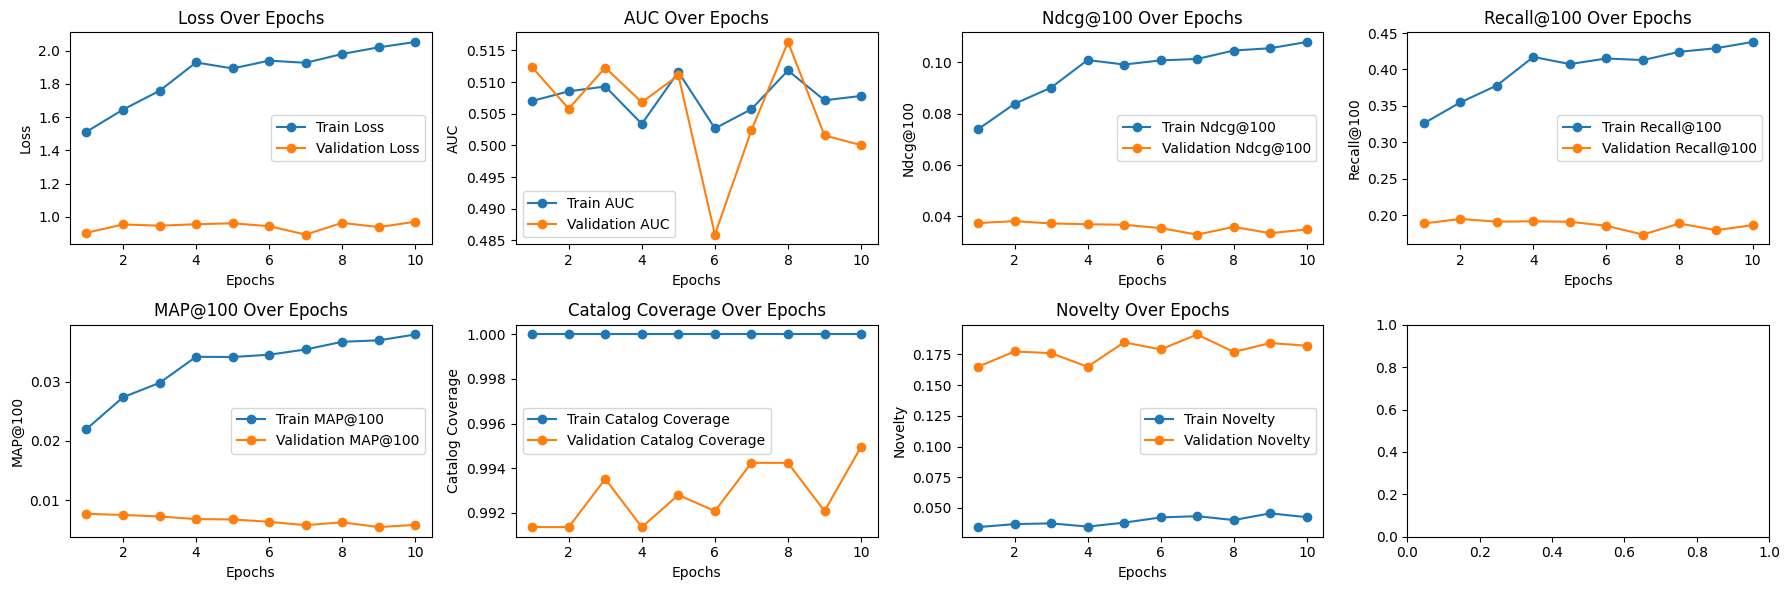

In [54]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


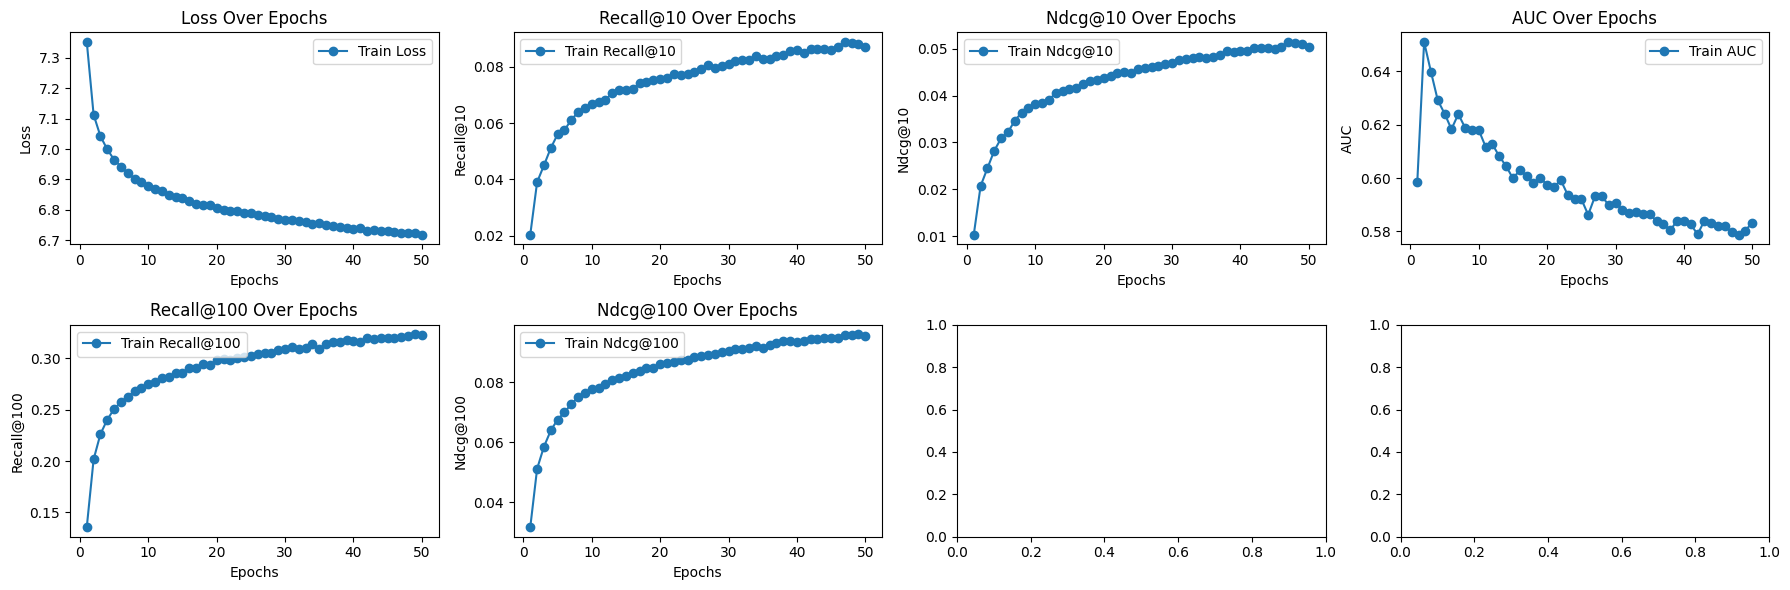

In [55]:
_history = merge_model_history(*history)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, None, default_plot_metrics | {'AUC': AUC_TERM, **METRIC_AT})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

#### eval

In [ ]:
# (model.evaluate(train, batch_size=2048, return_dict=True),
#  model.evaluate(valid, batch_size=2048, return_dict=True))

8/8 [==============================] - 1s 70ms/step - loss: 7.8620 - auc: 0.5681 - recall_at_100: 0.1212 - mrr_at_100: 0.0186 - ndcg_at_100: 0.0356 - map_at_100: 0.0186 - precision_at_100: 0.0012 - recall_at_10: 0.0227 - mrr_at_10: 0.0161 - ndcg_at_10: 0.0176 - map_at_10: 0.0161 - precision_at_10: 0.0023 - regularization_loss: 0.0000e+00 - loss_batch: 7.8307


({'loss': 6.699263095855713,
  'auc': 0.668052077293396,
  'recall_at_100': 0.3233526051044464,
  'mrr_at_100': 0.05222870782017708,
  'ndcg_at_100': 0.10056475549936295,
  'map_at_100': 0.05222870782017708,
  'precision_at_100': 0.0032335256692022085,
  'recall_at_10': 0.095282182097435,
  'mrr_at_10': 0.04530993476510048,
  'ndcg_at_10': 0.056927017867565155,
  'map_at_10': 0.04530993476510048,
  'precision_at_10': 0.00952821783721447,
  'regularization_loss': 0.0,
  'loss_batch': 4.1432576179504395},
 {'loss': 7.861959934234619,
  'auc': 0.5680776238441467,
  'recall_at_100': 0.13334225118160248,
  'mrr_at_100': 0.01585257612168789,
  'ndcg_at_100': 0.03536121919751167,
  'map_at_100': 0.01585257612168789,
  'precision_at_100': 0.0013334223767742515,
  'recall_at_10': 0.020997727289795876,
  'mrr_at_10': 0.012997585348784924,
  'ndcg_at_10': 0.014806998893618584,
  'map_at_10': 0.012997585348784924,
  'precision_at_10': 0.0020997729152441025,
  'regularization_loss': 0.0,
  'loss_ba

In [ ]:
evaluate_model(model, train, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 4s 20ms/step - loss: 1.8865 - auc_21: 0.4858 - recall_at_100: 0.3987 - mrr_at_100: 0.0316 - ndcg_at_100: 0.0950 - map_at_100: 0.0316 - precision_at_100: 0.0040 - regularization_loss: 0.0000e+00 - loss_batch: 1.9057
Candidate set rows: 943


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


{'loss': 1.8864508867263794,
 'auc_21': 0.4857785701751709,
 'recall_at_100': 0.3994045853614807,
 'mrr_at_100': 0.03349835425615311,
 'ndcg_at_100': 0.09687190502882004,
 'map_at_100': 0.03349835425615311,
 'precision_at_100': 0.003994045313447714,
 'regularization_loss': 0.0,
 'loss_batch': 2.818242073059082,
 'coverage': 1.0,
 'novelty': 0.04531693017444375}

In [ ]:
evaluate_model(model, valid, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 4s 33ms/step - loss: 0.9953 - auc_22: 0.4727 - recall_at_100: 0.1899 - mrr_at_100: 0.0059 - ndcg_at_100: 0.0358 - map_at_100: 0.0059 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0450
Candidate set rows: 943


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


{'loss': 0.9952747225761414,
 'auc_22': 0.4727213978767395,
 'recall_at_100': 0.19292497634887695,
 'mrr_at_100': 0.006211184896528721,
 'ndcg_at_100': 0.0365414135158062,
 'map_at_100': 0.006211184896528721,
 'precision_at_100': 0.0019292497308924794,
 'regularization_loss': 0.0,
 'loss_batch': 1.5650469064712524,
 'coverage': 1.0,
 'novelty': 0.18732618196265396}

### model_v9

In [68]:
# _tower_dim = (64, 128) # @param
# _tower_dim = (128, 64) # @param
_tower_dim = [512, 256] # @param

_learning_rate = 0.01 # @param
# _batch_size = 4096 # @param
_batch_size = 1024 * 2 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = 1024 # @param
# _popularity_sampler = True
_validation_freq = 5 # @param

embedding_dims = {
    'item': {
        'movie_id': 64,
        'genres': 8*2
    },
    'user': {
        'user_id': 64,
        'gender': 8,
        'occupation': 8*2
    }
}

In [69]:
from merlin.models.tf.outputs.sampling.popularity import PopularityBasedSamplerV2
from merlin.models.tf.outputs.sampling.in_batch import InBatchSamplerV2


sampler = [InBatchSamplerV2(_sample_neg)]

###
model_v9 = model = build_towers(train.schema, tower_dim=_tower_dim,
                        neg_sampler=sampler, embedding_dims=embedding_dims)
train_evaluation_clbk_v9 = EvaluationCallback(period=5, topk=100, data=train, type_='Train')
valid_evaluation_clbk_v9 = EvaluationCallback(period=5, topk=100, data=valid, type_='Validation')
history_v9 = []
###

TOP_K = [100, 50, 10]
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)



In [70]:
VERSION = 'v9'

#### model

In [76]:
history = globals()[f'history_{VERSION}']
model = globals()[f'model_{VERSION}']
train_evaluation_clbk = globals()[f'train_evaluation_clbk_{VERSION}']
valid_evaluation_clbk = globals()[f'valid_evaluation_clbk_{VERSION}']

In [77]:
# %pdb on
_epochs = 20
history.append(
    model.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs,
                 validation_batch_size=_validation_batch_size, validation_freq=_validation_freq,
                 callbacks=[train_evaluation_clbk,
                            valid_evaluation_clbk],
                  verbose=1)
)

Epoch 1/20
35/35 [==============================] - 4s 65ms/step - loss: 6.7520 - auc_65: 0.5960 - recall_at_100: 0.3183 - mrr_at_100: 0.0454 - ndcg_at_100: 0.0937 - map_at_100: 0.0454 - precision_at_100: 0.0032 - recall_at_50: 0.2137 - mrr_at_50: 0.0439 - ndcg_at_50: 0.0768 - map_at_50: 0.0439 - precision_at_50: 0.0043 - recall_at_10: 0.0855 - mrr_at_10: 0.0385 - ndcg_at_10: 0.0494 - map_at_10: 0.0385 - precision_at_10: 0.0085 - regularization_loss: 0.0000e+00 - loss_batch: 6.6638
Epoch 2/20
35/35 [==============================] - 3s 47ms/step - loss: 6.7475 - auc_65: 0.5915 - recall_at_100: 0.3201 - mrr_at_100: 0.0466 - ndcg_at_100: 0.0950 - map_at_100: 0.0466 - precision_at_100: 0.0032 - recall_at_50: 0.2169 - mrr_at_50: 0.0451 - ndcg_at_50: 0.0783 - map_at_50: 0.0451 - precision_at_50: 0.0043 - recall_at_10: 0.0860 - mrr_at_10: 0.0395 - ndcg_at_10: 0.0503 - map_at_10: 0.0395 - precision_at_10: 0.0086 - regularization_loss: 0.0000e+00 - loss_batch: 6.6586
Epoch 3/20
35/35 [========

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 19ms/step - loss: 2.1115 - auc_86: 0.5377 - recall_at_100: 0.4456 - mrr_at_100: 0.0370 - ndcg_at_100: 0.1082 - map_at_100: 0.0370 - precision_at_100: 0.0045 - regularization_loss: 0.0000e+00 - loss_batch: 2.1243


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.1114728450775146, 'auc_86': 0.5377355813980103, 'recall_at_100': 0.44917523860931396, 'mrr_at_100': 0.03765753656625748, 'ndcg_at_100': 0.10936886072158813, 'map_at_100': 0.03765753656625748, 'precision_at_100': 0.00449175201356411, 'regularization_loss': 0.0, 'loss_batch': 2.732997417449951, 'coverage': 1.0, 'novelty': 0.034900074019245005}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 23ms/step - loss: 0.9593 - auc_87: 0.5434 - recall_at_100: 0.1894 - mrr_at_100: 0.0067 - ndcg_at_100: 0.0364 - map_at_100: 0.0067 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0019
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.959328830242157, 'auc_87': 0.5434228181838989, 'recall_at_100': 0.18683964014053345, 'mrr_at_100': 0.006392017938196659, 'ndcg_at_100': 0.035737041383981705, 'map_at_100': 0.006392017938196659, 'precision_at_100': 0.0018683961825445294, 'regularization_loss': 0.0, 'loss_batch': 1.4473505020141602, 'coverage': 0.9913482335976929, 'novelty': 0.17033959537572255}
35/35 [==============================] - 138s 4s/step - loss: 6.7463 - auc_65: 0.5931 - recall_at_100: 0.3212 - mrr_at_100: 0.0460 - ndcg_at_100: 0.0948 - map_at_100: 0.0460 - precision_at_100: 0.0032 - recall_at_50: 0.2201 - mrr_at_50: 0.0446 - ndcg_at_50: 0.0785 - map_at_50: 0.0446 - precision_at_50: 0.0044 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 4s 58ms/step - loss: 6.7437 - auc_65: 0.5874 - recall_at_100: 0.3172 - mrr_at_100: 0.0465 - ndcg_at_100: 0.0945 - map_at_100: 0.0465 - precision_at_100: 0.0032 - recall_at_50: 0.2165 - mrr_at_50: 0.0451 - ndcg_at_50: 0.0783 - map_at_50: 0.0451 - precision_at_50: 0.0043 - recall_at_10: 0.0864 - mrr_at_10: 0.0395 - ndcg_at_10: 0.0504 - map_at_10: 0.0395 - precision_at_10: 0.0086 - regularization_loss: 0.0000e+00 - loss_batch: 6.6550
Epoch 7/20
35/35 [==============================] - 4s 60ms/step - loss: 6.7376 - auc_65: 0.5931 - recall_at_100: 0.3253 - mrr_at_100: 0.0468 - ndcg_at_100: 0.0961 - map_at_100: 0.0468 - precision_at_100: 0.0033 - recall_at_50: 0.2179 - mrr_at_50: 0.0453 - ndcg_at_50: 0.0787 - map_at_50: 0.0453 - precision_at_50: 0.0044 - recall_at_10: 0.0868 - mrr_at_10: 0.0397 - ndcg_at_10: 0.0506 - map_at_10: 0.0397 - precision_at_10: 0.0087 - regularization_loss: 0.0000e+00 - loss_batch: 6.6484
Epoch 8/20
35/35 [===================

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 19ms/step - loss: 2.1242 - auc_88: 0.5154 - recall_at_100: 0.4440 - mrr_at_100: 0.0360 - ndcg_at_100: 0.1070 - map_at_100: 0.0360 - precision_at_100: 0.0044 - regularization_loss: 0.0000e+00 - loss_batch: 2.1363


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.1242449283599854, 'auc_88': 0.5153730511665344, 'recall_at_100': 0.44770804047584534, 'mrr_at_100': 0.03690497577190399, 'ndcg_at_100': 0.10840465873479843, 'map_at_100': 0.03690497577190399, 'precision_at_100': 0.004477080889046192, 'regularization_loss': 0.0, 'loss_batch': 2.7086191177368164, 'coverage': 1.0, 'novelty': 0.03906864979077765}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 23ms/step - loss: 0.9321 - auc_89: 0.5072 - recall_at_100: 0.1760 - mrr_at_100: 0.0058 - ndcg_at_100: 0.0333 - map_at_100: 0.0058 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 0.9765
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.932072639465332, 'auc_89': 0.5071784257888794, 'recall_at_100': 0.1797512322664261, 'mrr_at_100': 0.006117147859185934, 'ndcg_at_100': 0.0343400202691555, 'map_at_100': 0.006117147859185934, 'precision_at_100': 0.0017975122900679708, 'regularization_loss': 0.0, 'loss_batch': 1.4408262968063354, 'coverage': 0.9935111751982696, 'novelty': 0.1761628993087988}
35/35 [==============================] - 135s 4s/step - loss: 6.7402 - auc_65: 0.5868 - recall_at_100: 0.3199 - mrr_at_100: 0.0458 - ndcg_at_100: 0.0942 - map_at_100: 0.0458 - precision_at_100: 0.0032 - recall_at_50: 0.2147 - mrr_at_50: 0.0443 - ndcg_at_50: 0.0772 - map_at_50: 0.0443 - precision_at_50: 0.0043 - re

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 3s 55ms/step - loss: 6.7404 - auc_65: 0.5874 - recall_at_100: 0.3214 - mrr_at_100: 0.0461 - ndcg_at_100: 0.0949 - map_at_100: 0.0461 - precision_at_100: 0.0032 - recall_at_50: 0.2171 - mrr_at_50: 0.0446 - ndcg_at_50: 0.0780 - map_at_50: 0.0446 - precision_at_50: 0.0043 - recall_at_10: 0.0863 - mrr_at_10: 0.0390 - ndcg_at_10: 0.0500 - map_at_10: 0.0390 - precision_at_10: 0.0086 - regularization_loss: 0.0000e+00 - loss_batch: 6.6502
Epoch 12/20
35/35 [==============================] - 4s 72ms/step - loss: 6.7348 - auc_65: 0.5868 - recall_at_100: 0.3212 - mrr_at_100: 0.0474 - ndcg_at_100: 0.0959 - map_at_100: 0.0474 - precision_at_100: 0.0032 - recall_at_50: 0.2179 - mrr_at_50: 0.0460 - ndcg_at_50: 0.0793 - map_at_50: 0.0460 - precision_at_50: 0.0044 - recall_at_10: 0.0872 - mrr_at_10: 0.0404 - ndcg_at_10: 0.0513 - map_at_10: 0.0404 - precision_at_10: 0.0087 - regularization_loss: 0.0000e+00 - loss_batch: 6.6454
Epoch 13/20
35/35 [=================

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 18ms/step - loss: 2.1374 - auc_90: 0.5212 - recall_at_100: 0.4526 - mrr_at_100: 0.0378 - ndcg_at_100: 0.1102 - map_at_100: 0.0378 - precision_at_100: 0.0045 - regularization_loss: 0.0000e+00 - loss_batch: 2.1488


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.1373703479766846, 'auc_90': 0.5211678743362427, 'recall_at_100': 0.4550012946128845, 'mrr_at_100': 0.03882060945034027, 'ndcg_at_100': 0.11153510212898254, 'map_at_100': 0.03882060945034027, 'precision_at_100': 0.004550013225525618, 'regularization_loss': 0.0, 'loss_batch': 2.693120002746582, 'coverage': 1.0, 'novelty': 0.035780686776702715}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 4s 32ms/step - loss: 0.9955 - auc_91: 0.5243 - recall_at_100: 0.1957 - mrr_at_100: 0.0062 - ndcg_at_100: 0.0370 - map_at_100: 0.0062 - precision_at_100: 0.0020 - regularization_loss: 0.0000e+00 - loss_batch: 1.0361
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9954931735992432, 'auc_91': 0.5243293046951294, 'recall_at_100': 0.19305871427059174, 'mrr_at_100': 0.006141900550574064, 'ndcg_at_100': 0.03652073070406914, 'map_at_100': 0.006141900550574064, 'precision_at_100': 0.001930587226524949, 'regularization_loss': 0.0, 'loss_batch': 1.4609830379486084, 'coverage': 0.9942321557317952, 'novelty': 0.1559708898445253}
35/35 [==============================] - 174s 5s/step - loss: 6.7297 - auc_65: 0.5879 - recall_at_100: 0.3229 - mrr_at_100: 0.0470 - ndcg_at_100: 0.0960 - map_at_100: 0.0470 - precision_at_100: 0.0032 - recall_at_50: 0.2194 - mrr_at_50: 0.0456 - ndcg_at_50: 0.0793 - map_at_50: 0.0456 - precision_at_50: 0.0044 - 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 4s 51ms/step - loss: 6.7301 - auc_65: 0.5875 - recall_at_100: 0.3268 - mrr_at_100: 0.0478 - ndcg_at_100: 0.0972 - map_at_100: 0.0478 - precision_at_100: 0.0033 - recall_at_50: 0.2210 - mrr_at_50: 0.0463 - ndcg_at_50: 0.0801 - map_at_50: 0.0463 - precision_at_50: 0.0044 - recall_at_10: 0.0880 - mrr_at_10: 0.0406 - ndcg_at_10: 0.0516 - map_at_10: 0.0406 - precision_at_10: 0.0088 - regularization_loss: 0.0000e+00 - loss_batch: 6.6405
Epoch 17/20
35/35 [==============================] - 3s 53ms/step - loss: 6.7288 - auc_65: 0.5856 - recall_at_100: 0.3283 - mrr_at_100: 0.0477 - ndcg_at_100: 0.0973 - map_at_100: 0.0477 - precision_at_100: 0.0033 - recall_at_50: 0.2210 - mrr_at_50: 0.0462 - ndcg_at_50: 0.0800 - map_at_50: 0.0462 - precision_at_50: 0.0044 - recall_at_10: 0.0878 - mrr_at_10: 0.0404 - ndcg_at_10: 0.0514 - map_at_10: 0.0404 - precision_at_10: 0.0088 - regularization_loss: 0.0000e+00 - loss_batch: 6.6380
Epoch 18/20
35/35 [=================

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 18ms/step - loss: 2.0835 - auc_92: 0.5226 - recall_at_100: 0.4382 - mrr_at_100: 0.0357 - ndcg_at_100: 0.1057 - map_at_100: 0.0357 - precision_at_100: 0.0044 - regularization_loss: 0.0000e+00 - loss_batch: 2.0959
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.0835037231445312, 'auc_92': 0.522613525390625, 'recall_at_100': 0.43759438395500183, 'mrr_at_100': 0.0368807427585125, 'ndcg_at_100': 0.1067553237080574, 'map_at_100': 0.0368807427585125, 'precision_at_100': 0.004375943914055824, 'regularization_loss': 0.0, 'loss_batch': 2.6838178634643555, 'coverage': 1.0, 'novelty': 0.04310660084110441}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 22ms/step - loss: 0.9560 - auc_93: 0.5265 - recall_at_100: 0.1782 - mrr_at_100: 0.0052 - ndcg_at_100: 0.0331 - map_at_100: 0.0052 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 1.0042
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9559736847877502, 'auc_93': 0.5265411734580994, 'recall_at_100': 0.18195800483226776, 'mrr_at_100': 0.005473662633448839, 'ndcg_at_100': 0.03403662517666817, 'map_at_100': 0.005473662633448839, 'precision_at_100': 0.0018195799784734845, 'regularization_loss': 0.0, 'loss_batch': 1.508747935295105, 'coverage': 0.9956741167988464, 'novelty': 0.18385650224215244}
35/35 [==============================] - 146s 4s/step - loss: 6.7204 - auc_65: 0.5849 - recall_at_100: 0.3262 - mrr_at_100: 0.0482 - ndcg_at_100: 0.0976 - map_at_100: 0.0482 - precision_at_100: 0.0033 - recall_at_50: 0.2223 - mrr_at_50: 0.0467 - ndcg_at_50: 0.0808 - map_at_50: 0.0467 - precision_at_50: 0.0044 -

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


#### analysis

In [78]:
history = globals()[f'history_{VERSION}']
model = globals()[f'model_{VERSION}']
train_evaluation_clbk = globals()[f'train_evaluation_clbk_{VERSION}']
valid_evaluation_clbk = globals()[f'valid_evaluation_clbk_{VERSION}']

Plot for model v9


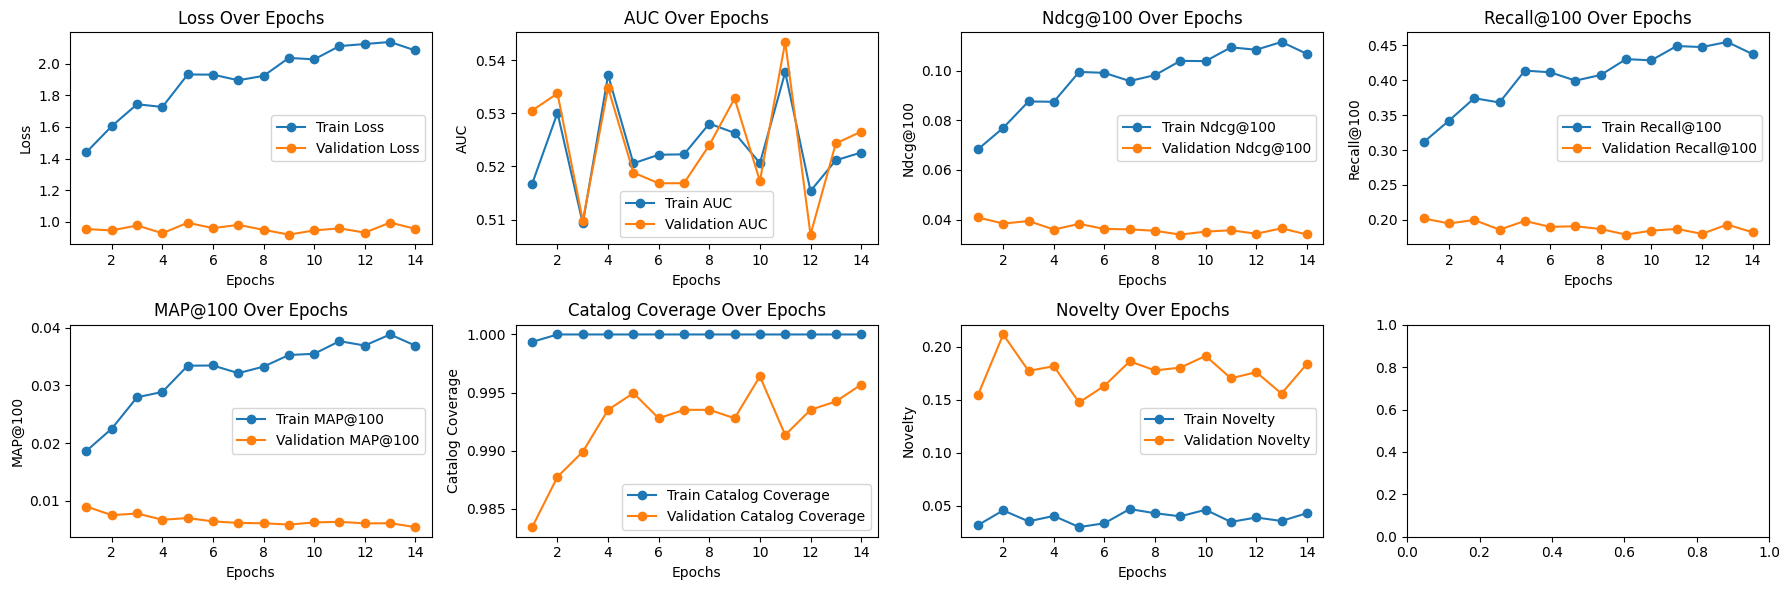

In [79]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


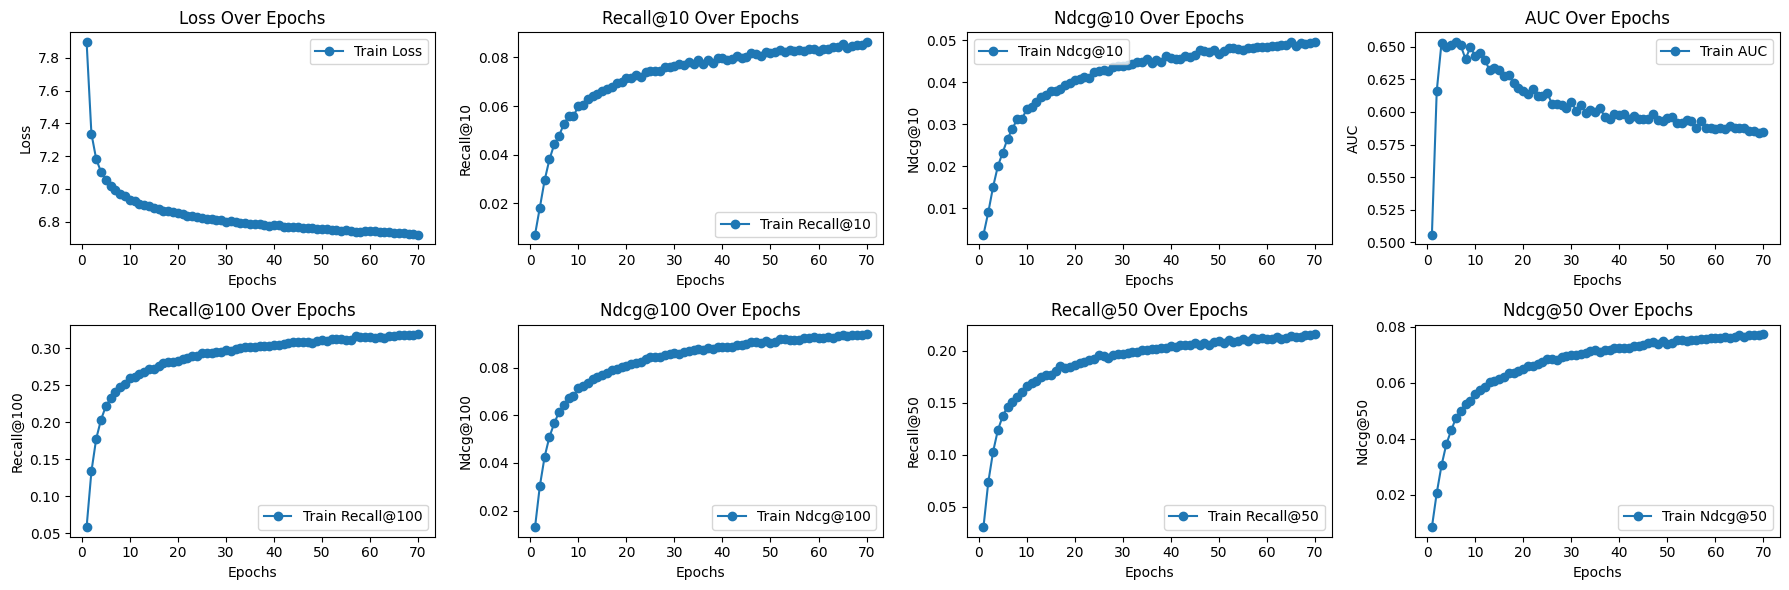

In [80]:
_history = merge_model_history(*history)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, None, default_plot_metrics | {'AUC': AUC_TERM, **METRIC_AT})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

#### eval

In [ ]:
# (model.evaluate(train, batch_size=2048, return_dict=True),
#  model.evaluate(valid, batch_size=2048, return_dict=True))

8/8 [==============================] - 1s 70ms/step - loss: 7.8620 - auc: 0.5681 - recall_at_100: 0.1212 - mrr_at_100: 0.0186 - ndcg_at_100: 0.0356 - map_at_100: 0.0186 - precision_at_100: 0.0012 - recall_at_10: 0.0227 - mrr_at_10: 0.0161 - ndcg_at_10: 0.0176 - map_at_10: 0.0161 - precision_at_10: 0.0023 - regularization_loss: 0.0000e+00 - loss_batch: 7.8307


({'loss': 6.699263095855713,
  'auc': 0.668052077293396,
  'recall_at_100': 0.3233526051044464,
  'mrr_at_100': 0.05222870782017708,
  'ndcg_at_100': 0.10056475549936295,
  'map_at_100': 0.05222870782017708,
  'precision_at_100': 0.0032335256692022085,
  'recall_at_10': 0.095282182097435,
  'mrr_at_10': 0.04530993476510048,
  'ndcg_at_10': 0.056927017867565155,
  'map_at_10': 0.04530993476510048,
  'precision_at_10': 0.00952821783721447,
  'regularization_loss': 0.0,
  'loss_batch': 4.1432576179504395},
 {'loss': 7.861959934234619,
  'auc': 0.5680776238441467,
  'recall_at_100': 0.13334225118160248,
  'mrr_at_100': 0.01585257612168789,
  'ndcg_at_100': 0.03536121919751167,
  'map_at_100': 0.01585257612168789,
  'precision_at_100': 0.0013334223767742515,
  'recall_at_10': 0.020997727289795876,
  'mrr_at_10': 0.012997585348784924,
  'ndcg_at_10': 0.014806998893618584,
  'map_at_10': 0.012997585348784924,
  'precision_at_10': 0.0020997729152441025,
  'regularization_loss': 0.0,
  'loss_ba

In [ ]:
evaluate_model(model, train, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 4s 20ms/step - loss: 1.8865 - auc_21: 0.4858 - recall_at_100: 0.3987 - mrr_at_100: 0.0316 - ndcg_at_100: 0.0950 - map_at_100: 0.0316 - precision_at_100: 0.0040 - regularization_loss: 0.0000e+00 - loss_batch: 1.9057
Candidate set rows: 943


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


{'loss': 1.8864508867263794,
 'auc_21': 0.4857785701751709,
 'recall_at_100': 0.3994045853614807,
 'mrr_at_100': 0.03349835425615311,
 'ndcg_at_100': 0.09687190502882004,
 'map_at_100': 0.03349835425615311,
 'precision_at_100': 0.003994045313447714,
 'regularization_loss': 0.0,
 'loss_batch': 2.818242073059082,
 'coverage': 1.0,
 'novelty': 0.04531693017444375}

In [ ]:
evaluate_model(model, valid, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 4s 33ms/step - loss: 0.9953 - auc_22: 0.4727 - recall_at_100: 0.1899 - mrr_at_100: 0.0059 - ndcg_at_100: 0.0358 - map_at_100: 0.0059 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0450
Candidate set rows: 943


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


{'loss': 0.9952747225761414,
 'auc_22': 0.4727213978767395,
 'recall_at_100': 0.19292497634887695,
 'mrr_at_100': 0.006211184896528721,
 'ndcg_at_100': 0.0365414135158062,
 'map_at_100': 0.006211184896528721,
 'precision_at_100': 0.0019292497308924794,
 'regularization_loss': 0.0,
 'loss_batch': 1.5650469064712524,
 'coverage': 1.0,
 'novelty': 0.18732618196265396}

### model_v10

In [91]:
# _tower_dim = (64, 128) # @param
# _tower_dim = (128, 64) # @param
_tower_dim = [512, 256] # @param

_learning_rate = 0.01 # @param
# _batch_size = 4096 # @param
_batch_size = 1024 * 2 # @param
_epochs = 50 # @param
_validation_batch_size = 2048 # @param
_sample_neg = 1024 # @param
# _popularity_sampler = True
_validation_freq = 5 # @param

embedding_dims = {
    'item': {
        'movie_id': 64,
        'genres': 8*2,
        'cast': 64,
    },
    'user': {
        'user_id': 64,
        'gender': 8,
        'occupation': 8*2,
    }
}

In [92]:
from merlin.models.tf.outputs.sampling.popularity import PopularityBasedSamplerV2
from merlin.models.tf.outputs.sampling.in_batch import InBatchSamplerV2


sampler = [InBatchSamplerV2(_sample_neg)]

###
model_v10 = model = build_towers(train.schema, tower_dim=_tower_dim,
                        neg_sampler=sampler, embedding_dims=embedding_dims)
train_evaluation_clbk_v10 = EvaluationCallback(period=5, topk=100, data=train, type_='Train')
valid_evaluation_clbk_v10 = EvaluationCallback(period=5, topk=100, data=valid, type_='Validation')
history_v10 = []
###

TOP_K = [100, 50, 10]
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(from_logits=True),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)



In [93]:
VERSION = 'v10'

#### model

In [94]:
history = globals()[f'history_{VERSION}']
model = globals()[f'model_{VERSION}']
train_evaluation_clbk = globals()[f'train_evaluation_clbk_{VERSION}']
valid_evaluation_clbk = globals()[f'valid_evaluation_clbk_{VERSION}']

In [95]:
# %pdb on
# _epochs = 20
history.append(
    model.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs,
                 validation_batch_size=_validation_batch_size, validation_freq=_validation_freq,
                 callbacks=[train_evaluation_clbk,
                            valid_evaluation_clbk],
                  verbose=1)
)

Epoch 1/50
35/35 [==============================] - 30s 463ms/step - loss: 8.0078 - auc_116: 0.5073 - recall_at_100: 0.0545 - mrr_at_100: 0.0034 - ndcg_at_100: 0.0119 - map_at_100: 0.0034 - precision_at_100: 5.4472e-04 - recall_at_50: 0.0278 - mrr_at_50: 0.0030 - ndcg_at_50: 0.0076 - map_at_50: 0.0030 - precision_at_50: 5.5549e-04 - recall_at_10: 0.0064 - mrr_at_10: 0.0022 - ndcg_at_10: 0.0031 - map_at_10: 0.0022 - precision_at_10: 6.3992e-04 - regularization_loss: 0.0000e+00 - loss_batch: 7.9246
Epoch 2/50
35/35 [==============================] - 13s 324ms/step - loss: 7.3846 - auc_116: 0.5937 - recall_at_100: 0.0945 - mrr_at_100: 0.0059 - ndcg_at_100: 0.0208 - map_at_100: 0.0059 - precision_at_100: 9.4486e-04 - recall_at_50: 0.0506 - mrr_at_50: 0.0053 - ndcg_at_50: 0.0137 - map_at_50: 0.0053 - precision_at_50: 0.0010 - recall_at_10: 0.0119 - mrr_at_10: 0.0037 - ndcg_at_10: 0.0056 - map_at_10: 0.0037 - precision_at_10: 0.0012 - regularization_loss: 0.0000e+00 - loss_batch: 7.3165
Epoc

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 7s 32ms/step - loss: 1.4185 - auc_117: 0.6028 - recall_at_100: 0.3052 - mrr_at_100: 0.0175 - ndcg_at_100: 0.0662 - map_at_100: 0.0175 - precision_at_100: 0.0031 - regularization_loss: 0.0000e+00 - loss_batch: 1.4233


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.418521523475647, 'auc_117': 0.6027555465698242, 'recall_at_100': 0.30621635913848877, 'mrr_at_100': 0.01770092360675335, 'ndcg_at_100': 0.06652636080980301, 'map_at_100': 0.01770092360675335, 'precision_at_100': 0.0030621630139648914, 'regularization_loss': 0.0, 'loss_batch': 1.6496713161468506, 'coverage': 0.9974375400384369, 'novelty': 0.03068962150551632}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 23ms/step - loss: 0.9598 - auc_118: 0.6136 - recall_at_100: 0.2051 - mrr_at_100: 0.0082 - ndcg_at_100: 0.0405 - map_at_100: 0.0082 - precision_at_100: 0.0021 - regularization_loss: 0.0000e+00 - loss_batch: 1.0002
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9597897529602051, 'auc_118': 0.6135985851287842, 'recall_at_100': 0.20322321355342865, 'mrr_at_100': 0.008770065382122993, 'ndcg_at_100': 0.04084164649248123, 'map_at_100': 0.008770065382122993, 'precision_at_100': 0.0020322322379797697, 'regularization_loss': 0.0, 'loss_batch': 1.4223358631134033, 'coverage': 0.9740447007930786, 'novelty': 0.15504768168365668}
35/35 [==============================] - 145s 4s/step - loss: 7.0724 - auc_116: 0.6867 - recall_at_100: 0.2118 - mrr_at_100: 0.0217 - ndcg_at_100: 0.0544 - map_at_100: 0.0217 - precision_at_100: 0.0021 - recall_at_50: 0.1289 - mrr_at_50: 0.0205 - ndcg_at_50: 0.0411 - map_at_50: 0.0205 - precision_at_50: 0.00

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 10s 199ms/step - loss: 7.0294 - auc_116: 0.6991 - recall_at_100: 0.2313 - mrr_at_100: 0.0246 - ndcg_at_100: 0.0605 - map_at_100: 0.0246 - precision_at_100: 0.0023 - recall_at_50: 0.1428 - mrr_at_50: 0.0234 - ndcg_at_50: 0.0462 - map_at_50: 0.0234 - precision_at_50: 0.0029 - recall_at_10: 0.0485 - mrr_at_10: 0.0194 - ndcg_at_10: 0.0261 - map_at_10: 0.0194 - precision_at_10: 0.0048 - regularization_loss: 0.0000e+00 - loss_batch: 6.9577
Epoch 7/50
35/35 [==============================] - 5s 107ms/step - loss: 6.9983 - auc_116: 0.6988 - recall_at_100: 0.2418 - mrr_at_100: 0.0267 - ndcg_at_100: 0.0642 - map_at_100: 0.0267 - precision_at_100: 0.0024 - recall_at_50: 0.1527 - mrr_at_50: 0.0255 - ndcg_at_50: 0.0498 - map_at_50: 0.0255 - precision_at_50: 0.0031 - recall_at_10: 0.0516 - mrr_at_10: 0.0212 - ndcg_at_10: 0.0283 - map_at_10: 0.0212 - precision_at_10: 0.0052 - regularization_loss: 0.0000e+00 - loss_batch: 6.9254
Epoch 8/50
35/35 [==============

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 22ms/step - loss: 1.5867 - auc_119: 0.5889 - recall_at_100: 0.3392 - mrr_at_100: 0.0213 - ndcg_at_100: 0.0752 - map_at_100: 0.0213 - precision_at_100: 0.0034 - regularization_loss: 0.0000e+00 - loss_batch: 1.5955
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.5866695642471313, 'auc_119': 0.5889337658882141, 'recall_at_100': 0.33724111318588257, 'mrr_at_100': 0.021572038531303406, 'ndcg_at_100': 0.07518254965543747, 'map_at_100': 0.021572038531303406, 'precision_at_100': 0.0033724107779562473, 'regularization_loss': 0.0, 'loss_batch': 2.0146584510803223, 'coverage': 1.0, 'novelty': 0.04518231038282785}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 23ms/step - loss: 0.9231 - auc_120: 0.5950 - recall_at_100: 0.1847 - mrr_at_100: 0.0075 - ndcg_at_100: 0.0366 - map_at_100: 0.0075 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 0.9738
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9230501651763916, 'auc_120': 0.5949546694755554, 'recall_at_100': 0.189982607960701, 'mrr_at_100': 0.008112296462059021, 'ndcg_at_100': 0.03807338699698448, 'map_at_100': 0.008112296462059021, 'precision_at_100': 0.0018998259911313653, 'regularization_loss': 0.0, 'loss_batch': 1.5040526390075684, 'coverage': 0.976928622927181, 'novelty': 0.2034519956850054}
35/35 [==============================] - 181s 5s/step - loss: 6.9447 - auc_116: 0.6902 - recall_at_100: 0.2595 - mrr_at_100: 0.0322 - ndcg_at_100: 0.0719 - map_at_100: 0.0322 - precision_at_100: 0.0026 - recall_at_50: 0.1683 - mrr_at_50: 0.0309 - ndcg_at_50: 0.0572 - map_at_50: 0.0309 - precision_at_50: 0.0034 -

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 4s 74ms/step - loss: 6.9286 - auc_116: 0.6889 - recall_at_100: 0.2641 - mrr_at_100: 0.0324 - ndcg_at_100: 0.0729 - map_at_100: 0.0324 - precision_at_100: 0.0026 - recall_at_50: 0.1708 - mrr_at_50: 0.0311 - ndcg_at_50: 0.0579 - map_at_50: 0.0311 - precision_at_50: 0.0034 - recall_at_10: 0.0611 - mrr_at_10: 0.0266 - ndcg_at_10: 0.0346 - map_at_10: 0.0266 - precision_at_10: 0.0061 - regularization_loss: 0.0000e+00 - loss_batch: 6.8510
Epoch 12/50
35/35 [==============================] - 5s 89ms/step - loss: 6.9167 - auc_116: 0.6967 - recall_at_100: 0.2676 - mrr_at_100: 0.0340 - ndcg_at_100: 0.0748 - map_at_100: 0.0340 - precision_at_100: 0.0027 - recall_at_50: 0.1718 - mrr_at_50: 0.0326 - ndcg_at_50: 0.0593 - map_at_50: 0.0326 - precision_at_50: 0.0034 - recall_at_10: 0.0628 - mrr_at_10: 0.0280 - ndcg_at_10: 0.0361 - map_at_10: 0.0280 - precision_at_10: 0.0063 - regularization_loss: 0.0000e+00 - loss_batch: 6.8380
Epoch 13/50
35/35 [===============

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 31ms/step - loss: 1.7642 - auc_121: 0.5588 - recall_at_100: 0.3696 - mrr_at_100: 0.0253 - ndcg_at_100: 0.0840 - map_at_100: 0.0253 - precision_at_100: 0.0037 - regularization_loss: 0.0000e+00 - loss_batch: 1.7758


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.7642215490341187, 'auc_121': 0.5588105916976929, 'recall_at_100': 0.37214040756225586, 'mrr_at_100': 0.025721384212374687, 'ndcg_at_100': 0.08472731709480286, 'map_at_100': 0.025721384212374687, 'precision_at_100': 0.0037214038893580437, 'regularization_loss': 0.0, 'loss_batch': 2.327056884765625, 'coverage': 1.0, 'novelty': 0.04159315455187015}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 23ms/step - loss: 0.9567 - auc_122: 0.5709 - recall_at_100: 0.1901 - mrr_at_100: 0.0074 - ndcg_at_100: 0.0372 - map_at_100: 0.0074 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0077
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9567390084266663, 'auc_122': 0.5709083080291748, 'recall_at_100': 0.19386117160320282, 'mrr_at_100': 0.007961166091263294, 'ndcg_at_100': 0.03851507604122162, 'map_at_100': 0.007961166091263294, 'precision_at_100': 0.0019386116182431579, 'regularization_loss': 0.0, 'loss_batch': 1.5405607223510742, 'coverage': 0.9855803893294881, 'novelty': 0.17337745909174482}
35/35 [==============================] - 138s 4s/step - loss: 6.8881 - auc_116: 0.6873 - recall_at_100: 0.2785 - mrr_at_100: 0.0355 - ndcg_at_100: 0.0782 - map_at_100: 0.0355 - precision_at_100: 0.0028 - recall_at_50: 0.1824 - mrr_at_50: 0.0342 - ndcg_at_50: 0.0627 - map_at_50: 0.0342 - precision_at_50: 0.00

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 6s 102ms/step - loss: 6.8815 - auc_116: 0.6787 - recall_at_100: 0.2765 - mrr_at_100: 0.0359 - ndcg_at_100: 0.0781 - map_at_100: 0.0359 - precision_at_100: 0.0028 - recall_at_50: 0.1807 - mrr_at_50: 0.0346 - ndcg_at_50: 0.0626 - map_at_50: 0.0346 - precision_at_50: 0.0036 - recall_at_10: 0.0664 - mrr_at_10: 0.0298 - ndcg_at_10: 0.0382 - map_at_10: 0.0298 - precision_at_10: 0.0066 - regularization_loss: 0.0000e+00 - loss_batch: 6.7987
Epoch 17/50
35/35 [==============================] - 3s 50ms/step - loss: 6.8708 - auc_116: 0.6853 - recall_at_100: 0.2806 - mrr_at_100: 0.0370 - ndcg_at_100: 0.0798 - map_at_100: 0.0370 - precision_at_100: 0.0028 - recall_at_50: 0.1836 - mrr_at_50: 0.0356 - ndcg_at_50: 0.0641 - map_at_50: 0.0356 - precision_at_50: 0.0037 - recall_at_10: 0.0690 - mrr_at_10: 0.0307 - ndcg_at_10: 0.0396 - map_at_10: 0.0307 - precision_at_10: 0.0069 - regularization_loss: 0.0000e+00 - loss_batch: 6.7893
Epoch 18/50
35/35 [==============

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 8s 33ms/step - loss: 1.7532 - auc_123: 0.5313 - recall_at_100: 0.3654 - mrr_at_100: 0.0261 - ndcg_at_100: 0.0842 - map_at_100: 0.0261 - precision_at_100: 0.0037 - regularization_loss: 0.0000e+00 - loss_batch: 1.7630
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.7531706094741821, 'auc_123': 0.5313094854354858, 'recall_at_100': 0.36762484908103943, 'mrr_at_100': 0.026373598724603653, 'ndcg_at_100': 0.08481737226247787, 'map_at_100': 0.026373598724603653, 'precision_at_100': 0.003676248248666525, 'regularization_loss': 0.0, 'loss_batch': 2.2317326068878174, 'coverage': 1.0, 'novelty': 0.05207067918277195}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 5s 36ms/step - loss: 0.9762 - auc_124: 0.5193 - recall_at_100: 0.1960 - mrr_at_100: 0.0070 - ndcg_at_100: 0.0377 - map_at_100: 0.0070 - precision_at_100: 0.0020 - regularization_loss: 0.0000e+00 - loss_batch: 1.0217
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9761748909950256, 'auc_124': 0.5193349123001099, 'recall_at_100': 0.1933930665254593, 'mrr_at_100': 0.007083588745445013, 'ndcg_at_100': 0.03742781654000282, 'map_at_100': 0.007083588745445013, 'precision_at_100': 0.0019339310238137841, 'regularization_loss': 0.0, 'loss_batch': 1.4978971481323242, 'coverage': 0.9848594087959625, 'novelty': 0.20106609808102346}
35/35 [==============================] - 147s 4s/step - loss: 6.8552 - auc_116: 0.6811 - recall_at_100: 0.2867 - mrr_at_100: 0.0375 - ndcg_at_100: 0.0811 - map_at_100: 0.0375 - precision_at_100: 0.0029 - recall_at_50: 0.1867 - mrr_at_50: 0.0361 - ndcg_at_50: 0.0650 - map_at_50: 0.0361 - precision_at_50: 0.003

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 6s 101ms/step - loss: 6.8500 - auc_116: 0.6806 - recall_at_100: 0.2895 - mrr_at_100: 0.0392 - ndcg_at_100: 0.0833 - map_at_100: 0.0392 - precision_at_100: 0.0029 - recall_at_50: 0.1925 - mrr_at_50: 0.0378 - ndcg_at_50: 0.0676 - map_at_50: 0.0378 - precision_at_50: 0.0038 - recall_at_10: 0.0741 - mrr_at_10: 0.0329 - ndcg_at_10: 0.0424 - map_at_10: 0.0329 - precision_at_10: 0.0074 - regularization_loss: 0.0000e+00 - loss_batch: 6.7670
Epoch 22/50
35/35 [==============================] - 3s 53ms/step - loss: 6.8467 - auc_116: 0.6760 - recall_at_100: 0.2881 - mrr_at_100: 0.0400 - ndcg_at_100: 0.0837 - map_at_100: 0.0400 - precision_at_100: 0.0029 - recall_at_50: 0.1922 - mrr_at_50: 0.0386 - ndcg_at_50: 0.0682 - map_at_50: 0.0386 - precision_at_50: 0.0038 - recall_at_10: 0.0729 - mrr_at_10: 0.0336 - ndcg_at_10: 0.0427 - map_at_10: 0.0336 - precision_at_10: 0.0073 - regularization_loss: 0.0000e+00 - loss_batch: 6.7634
Epoch 23/50
35/35 [==============

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 6s 32ms/step - loss: 1.8774 - auc_125: 0.5294 - recall_at_100: 0.3925 - mrr_at_100: 0.0302 - ndcg_at_100: 0.0924 - map_at_100: 0.0302 - precision_at_100: 0.0039 - regularization_loss: 0.0000e+00 - loss_batch: 1.8899
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.8773541450500488, 'auc_125': 0.5293615460395813, 'recall_at_100': 0.3962849974632263, 'mrr_at_100': 0.02994539774954319, 'ndcg_at_100': 0.09301257878541946, 'map_at_100': 0.02994539774954319, 'precision_at_100': 0.003962850198149681, 'regularization_loss': 0.0, 'loss_batch': 2.48624587059021, 'coverage': 1.0, 'novelty': 0.04291825960313126}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 36ms/step - loss: 0.9629 - auc_126: 0.5130 - recall_at_100: 0.1874 - mrr_at_100: 0.0069 - ndcg_at_100: 0.0362 - map_at_100: 0.0069 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0172
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9629424810409546, 'auc_126': 0.5129764080047607, 'recall_at_100': 0.19105255603790283, 'mrr_at_100': 0.006890646647661924, 'ndcg_at_100': 0.03692835196852684, 'map_at_100': 0.006890646647661924, 'precision_at_100': 0.001910525606945157, 'regularization_loss': 0.0, 'loss_batch': 1.5840637683868408, 'coverage': 0.9863013698630136, 'novelty': 0.19120032441200324}
35/35 [==============================] - 140s 4s/step - loss: 6.8329 - auc_116: 0.6806 - recall_at_100: 0.2955 - mrr_at_100: 0.0399 - ndcg_at_100: 0.0848 - map_at_100: 0.0399 - precision_at_100: 0.0030 - recall_at_50: 0.1931 - mrr_at_50: 0.0384 - ndcg_at_50: 0.0682 - map_at_50: 0.0384 - precision_at_50: 0.003

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 6s 93ms/step - loss: 6.8259 - auc_116: 0.6731 - recall_at_100: 0.2974 - mrr_at_100: 0.0405 - ndcg_at_100: 0.0857 - map_at_100: 0.0405 - precision_at_100: 0.0030 - recall_at_50: 0.1965 - mrr_at_50: 0.0391 - ndcg_at_50: 0.0695 - map_at_50: 0.0391 - precision_at_50: 0.0039 - recall_at_10: 0.0753 - mrr_at_10: 0.0340 - ndcg_at_10: 0.0436 - map_at_10: 0.0340 - precision_at_10: 0.0075 - regularization_loss: 0.0000e+00 - loss_batch: 6.7397
Epoch 27/50
35/35 [==============================] - 4s 53ms/step - loss: 6.8204 - auc_116: 0.6834 - recall_at_100: 0.2965 - mrr_at_100: 0.0411 - ndcg_at_100: 0.0861 - map_at_100: 0.0411 - precision_at_100: 0.0030 - recall_at_50: 0.1975 - mrr_at_50: 0.0397 - ndcg_at_50: 0.0701 - map_at_50: 0.0397 - precision_at_50: 0.0040 - recall_at_10: 0.0753 - mrr_at_10: 0.0345 - ndcg_at_10: 0.0440 - map_at_10: 0.0345 - precision_at_10: 0.0075 - regularization_loss: 0.0000e+00 - loss_batch: 6.7352
Epoch 28/50
35/35 [===============

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 20ms/step - loss: 1.8690 - auc_127: 0.5243 - recall_at_100: 0.3910 - mrr_at_100: 0.0298 - ndcg_at_100: 0.0921 - map_at_100: 0.0298 - precision_at_100: 0.0039 - regularization_loss: 0.0000e+00 - loss_batch: 1.8818
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.8689578771591187, 'auc_127': 0.5243252515792847, 'recall_at_100': 0.3923250138759613, 'mrr_at_100': 0.03037300705909729, 'ndcg_at_100': 0.09284121543169022, 'map_at_100': 0.03037300705909729, 'precision_at_100': 0.003923249896615744, 'regularization_loss': 0.0, 'loss_batch': 2.4924473762512207, 'coverage': 1.0, 'novelty': 0.05113328272421647}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 23ms/step - loss: 0.9589 - auc_128: 0.5061 - recall_at_100: 0.1840 - mrr_at_100: 0.0062 - ndcg_at_100: 0.0351 - map_at_100: 0.0062 - precision_at_100: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 1.0095
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9588956832885742, 'auc_128': 0.5060622096061707, 'recall_at_100': 0.18831081688404083, 'mrr_at_100': 0.006461704149842262, 'ndcg_at_100': 0.03608650714159012, 'map_at_100': 0.006461704149842262, 'precision_at_100': 0.0018831081688404083, 'regularization_loss': 0.0, 'loss_batch': 1.53850519657135, 'coverage': 0.9920692141312184, 'novelty': 0.20950899800044434}
35/35 [==============================] - 148s 4s/step - loss: 6.8067 - auc_116: 0.6756 - recall_at_100: 0.3001 - mrr_at_100: 0.0416 - ndcg_at_100: 0.0872 - map_at_100: 0.0416 - precision_at_100: 0.0030 - recall_at_50: 0.1989 - mrr_at_50: 0.0402 - ndcg_at_50: 0.0709 - map_at_50: 0.0402 - precision_at_50: 0.0040

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 3s 47ms/step - loss: 6.8102 - auc_116: 0.6762 - recall_at_100: 0.2972 - mrr_at_100: 0.0413 - ndcg_at_100: 0.0864 - map_at_100: 0.0413 - precision_at_100: 0.0030 - recall_at_50: 0.1975 - mrr_at_50: 0.0399 - ndcg_at_50: 0.0704 - map_at_50: 0.0399 - precision_at_50: 0.0039 - recall_at_10: 0.0776 - mrr_at_10: 0.0349 - ndcg_at_10: 0.0448 - map_at_10: 0.0349 - precision_at_10: 0.0078 - regularization_loss: 0.0000e+00 - loss_batch: 6.7227
Epoch 32/50
35/35 [==============================] - 5s 85ms/step - loss: 6.8022 - auc_116: 0.6671 - recall_at_100: 0.3044 - mrr_at_100: 0.0417 - ndcg_at_100: 0.0882 - map_at_100: 0.0417 - precision_at_100: 0.0030 - recall_at_50: 0.2034 - mrr_at_50: 0.0403 - ndcg_at_50: 0.0719 - map_at_50: 0.0403 - precision_at_50: 0.0041 - recall_at_10: 0.0794 - mrr_at_10: 0.0350 - ndcg_at_10: 0.0453 - map_at_10: 0.0350 - precision_at_10: 0.0079 - regularization_loss: 0.0000e+00 - loss_batch: 6.7139
Epoch 33/50
35/35 [===============

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 21ms/step - loss: 1.9276 - auc_129: 0.5310 - recall_at_100: 0.4028 - mrr_at_100: 0.0305 - ndcg_at_100: 0.0949 - map_at_100: 0.0305 - precision_at_100: 0.0040 - regularization_loss: 0.0000e+00 - loss_batch: 1.9392


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9276224374771118, 'auc_129': 0.5310016870498657, 'recall_at_100': 0.4067690372467041, 'mrr_at_100': 0.031535565853118896, 'ndcg_at_100': 0.09641721844673157, 'map_at_100': 0.031535565853118896, 'precision_at_100': 0.004067690577358007, 'regularization_loss': 0.0, 'loss_batch': 2.490459442138672, 'coverage': 1.0, 'novelty': 0.044353511123653634}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 24ms/step - loss: 0.9824 - auc_130: 0.5050 - recall_at_100: 0.1916 - mrr_at_100: 0.0063 - ndcg_at_100: 0.0363 - map_at_100: 0.0063 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0180
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9823879599571228, 'auc_130': 0.5050294399261475, 'recall_at_100': 0.19352681934833527, 'mrr_at_100': 0.006834651343524456, 'ndcg_at_100': 0.0372023768723011, 'map_at_100': 0.006834651343524456, 'precision_at_100': 0.0019352680537849665, 'regularization_loss': 0.0, 'loss_batch': 1.3901487588882446, 'coverage': 0.9899062725306417, 'novelty': 0.17705595193390913}
35/35 [==============================] - 138s 4s/step - loss: 6.7961 - auc_116: 0.6723 - recall_at_100: 0.3068 - mrr_at_100: 0.0436 - ndcg_at_100: 0.0901 - map_at_100: 0.0436 - precision_at_100: 0.0031 - recall_at_50: 0.2053 - mrr_at_50: 0.0422 - ndcg_at_50: 0.0737 - map_at_50: 0.0422 - precision_at_50: 0.004

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 5s 86ms/step - loss: 6.7966 - auc_116: 0.6626 - recall_at_100: 0.3088 - mrr_at_100: 0.0422 - ndcg_at_100: 0.0893 - map_at_100: 0.0422 - precision_at_100: 0.0031 - recall_at_50: 0.2057 - mrr_at_50: 0.0408 - ndcg_at_50: 0.0727 - map_at_50: 0.0408 - precision_at_50: 0.0041 - recall_at_10: 0.0802 - mrr_at_10: 0.0354 - ndcg_at_10: 0.0458 - map_at_10: 0.0354 - precision_at_10: 0.0080 - regularization_loss: 0.0000e+00 - loss_batch: 6.7110
Epoch 37/50
35/35 [==============================] - 4s 51ms/step - loss: 6.7884 - auc_116: 0.6720 - recall_at_100: 0.3057 - mrr_at_100: 0.0428 - ndcg_at_100: 0.0893 - map_at_100: 0.0428 - precision_at_100: 0.0031 - recall_at_50: 0.2055 - mrr_at_50: 0.0414 - ndcg_at_50: 0.0732 - map_at_50: 0.0414 - precision_at_50: 0.0041 - recall_at_10: 0.0800 - mrr_at_10: 0.0360 - ndcg_at_10: 0.0462 - map_at_10: 0.0360 - precision_at_10: 0.0080 - regularization_loss: 0.0000e+00 - loss_batch: 6.6997
Epoch 38/50
35/35 [===============

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 7s 30ms/step - loss: 1.9572 - auc_131: 0.4882 - recall_at_100: 0.4138 - mrr_at_100: 0.0320 - ndcg_at_100: 0.0982 - map_at_100: 0.0320 - precision_at_100: 0.0041 - regularization_loss: 0.0000e+00 - loss_batch: 1.9699
Candidate set rows: 943
Train dataset topk evaluation {'loss': 1.9572036266326904, 'auc_131': 0.48824772238731384, 'recall_at_100': 0.412253201007843, 'mrr_at_100': 0.03293420374393463, 'ndcg_at_100': 0.09865164011716843, 'map_at_100': 0.03293420374393463, 'precision_at_100': 0.004122531972825527, 'regularization_loss': 0.0, 'loss_batch': 2.5719552040100098, 'coverage': 1.0, 'novelty': 0.04295344811879384}


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 22ms/step - loss: 0.9312 - auc_132: 0.4401 - recall_at_100: 0.1741 - mrr_at_100: 0.0058 - ndcg_at_100: 0.0331 - map_at_100: 0.0058 - precision_at_100: 0.0017 - regularization_loss: 0.0000e+00 - loss_batch: 0.9774
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.9312340021133423, 'auc_132': 0.44013768434524536, 'recall_at_100': 0.18202488124370575, 'mrr_at_100': 0.0064116064459085464, 'ndcg_at_100': 0.03509962931275368, 'map_at_100': 0.0064116064459085464, 'precision_at_100': 0.0018202486680820584, 'regularization_loss': 0.0, 'loss_batch': 1.4600844383239746, 'coverage': 0.9884643114635905, 'novelty': 0.185119748723989}
35/35 [==============================] - 142s 4s/step - loss: 6.7812 - auc_116: 0.6700 - recall_at_100: 0.3114 - mrr_at_100: 0.0443 - ndcg_at_100: 0.0915 - map_at_100: 0.0443 - precision_at_100: 0.0031 - recall_at_50: 0.2113 - mrr_at_50: 0.0429 - ndcg_at_50: 0.0754 - map_at_50: 0.0429 - precision_at_50: 0.0

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 4s 75ms/step - loss: 6.7835 - auc_116: 0.6647 - recall_at_100: 0.3113 - mrr_at_100: 0.0440 - ndcg_at_100: 0.0912 - map_at_100: 0.0440 - precision_at_100: 0.0031 - recall_at_50: 0.2085 - mrr_at_50: 0.0425 - ndcg_at_50: 0.0746 - map_at_50: 0.0425 - precision_at_50: 0.0042 - recall_at_10: 0.0805 - mrr_at_10: 0.0370 - ndcg_at_10: 0.0471 - map_at_10: 0.0370 - precision_at_10: 0.0081 - regularization_loss: 0.0000e+00 - loss_batch: 6.6948
Epoch 42/50
35/35 [==============================] - 5s 70ms/step - loss: 6.7757 - auc_116: 0.6654 - recall_at_100: 0.3124 - mrr_at_100: 0.0434 - ndcg_at_100: 0.0910 - map_at_100: 0.0434 - precision_at_100: 0.0031 - recall_at_50: 0.2103 - mrr_at_50: 0.0420 - ndcg_at_50: 0.0745 - map_at_50: 0.0420 - precision_at_50: 0.0042 - recall_at_10: 0.0821 - mrr_at_10: 0.0366 - ndcg_at_10: 0.0471 - map_at_10: 0.0366 - precision_at_10: 0.0082 - regularization_loss: 0.0000e+00 - loss_batch: 6.6877
Epoch 43/50
35/35 [===============

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 19ms/step - loss: 2.0746 - auc_133: 0.5068 - recall_at_100: 0.4400 - mrr_at_100: 0.0346 - ndcg_at_100: 0.1049 - map_at_100: 0.0346 - precision_at_100: 0.0044 - regularization_loss: 0.0000e+00 - loss_batch: 2.0872
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.0745887756347656, 'auc_133': 0.5068180561065674, 'recall_at_100': 0.4400729238986969, 'mrr_at_100': 0.035788796842098236, 'ndcg_at_100': 0.10596786439418793, 'map_at_100': 0.035788796842098236, 'precision_at_100': 0.004400728270411491, 'regularization_loss': 0.0, 'loss_batch': 2.6850924491882324, 'coverage': 1.0, 'novelty': 0.03686617928769694}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 22ms/step - loss: 0.9841 - auc_134: 0.4753 - recall_at_100: 0.1936 - mrr_at_100: 0.0069 - ndcg_at_100: 0.0372 - map_at_100: 0.0069 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0301
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 0.984054446220398, 'auc_134': 0.47527211904525757, 'recall_at_100': 0.1925906091928482, 'mrr_at_100': 0.007000117562711239, 'ndcg_at_100': 0.03718709200620651, 'map_at_100': 0.007000117562711239, 'precision_at_100': 0.0019259059336036444, 'regularization_loss': 0.0, 'loss_batch': 1.5118014812469482, 'coverage': 0.9899062725306417, 'novelty': 0.167257892869812}
35/35 [==============================] - 145s 4s/step - loss: 6.7722 - auc_116: 0.6664 - recall_at_100: 0.3140 - mrr_at_100: 0.0438 - ndcg_at_100: 0.0915 - map_at_100: 0.0438 - precision_at_100: 0.0031 - recall_at_50: 0.2107 - mrr_at_50: 0.0424 - ndcg_at_50: 0.0748 - map_at_50: 0.0424 - precision_at_50: 0.0042 

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


35/35 [==============================] - 3s 48ms/step - loss: 6.7685 - auc_116: 0.6595 - recall_at_100: 0.3158 - mrr_at_100: 0.0442 - ndcg_at_100: 0.0922 - map_at_100: 0.0442 - precision_at_100: 0.0032 - recall_at_50: 0.2128 - mrr_at_50: 0.0427 - ndcg_at_50: 0.0756 - map_at_50: 0.0427 - precision_at_50: 0.0043 - recall_at_10: 0.0821 - mrr_at_10: 0.0372 - ndcg_at_10: 0.0476 - map_at_10: 0.0372 - precision_at_10: 0.0082 - regularization_loss: 0.0000e+00 - loss_batch: 6.6804
Epoch 47/50
35/35 [==============================] - 4s 58ms/step - loss: 6.7665 - auc_116: 0.6639 - recall_at_100: 0.3170 - mrr_at_100: 0.0453 - ndcg_at_100: 0.0933 - map_at_100: 0.0453 - precision_at_100: 0.0032 - recall_at_50: 0.2133 - mrr_at_50: 0.0438 - ndcg_at_50: 0.0766 - map_at_50: 0.0438 - precision_at_50: 0.0043 - recall_at_10: 0.0841 - mrr_at_10: 0.0384 - ndcg_at_10: 0.0490 - map_at_10: 0.0384 - precision_at_10: 0.0084 - regularization_loss: 0.0000e+00 - loss_batch: 6.6778
Epoch 48/50
35/35 [===============

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 20ms/step - loss: 2.0857 - auc_135: 0.4743 - recall_at_100: 0.4415 - mrr_at_100: 0.0355 - ndcg_at_100: 0.1062 - map_at_100: 0.0355 - precision_at_100: 0.0044 - regularization_loss: 0.0000e+00 - loss_batch: 2.0981
Candidate set rows: 943
Train dataset topk evaluation {'loss': 2.085704803466797, 'auc_135': 0.47427549958229065, 'recall_at_100': 0.4425087571144104, 'mrr_at_100': 0.036692652851343155, 'ndcg_at_100': 0.10741043835878372, 'map_at_100': 0.036692652851343155, 'precision_at_100': 0.0044250874780118465, 'regularization_loss': 0.0, 'loss_batch': 2.686095714569092, 'coverage': 1.0, 'novelty': 0.032361015785861355}
Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 4s 21ms/step - loss: 1.0226 - auc_136: 0.4250 - recall_at_100: 0.1968 - mrr_at_100: 0.0064 - ndcg_at_100: 0.0374 - map_at_100: 0.0064 - precision_at_100: 0.0020 - regularization_loss: 0.0000e+00 - loss_batch: 1.0643
Candidate set rows: 943
Validation dataset topk evaluation {'loss': 1.0225759744644165, 'auc_136': 0.42502862215042114, 'recall_at_100': 0.1994115263223648, 'mrr_at_100': 0.006681549828499556, 'ndcg_at_100': 0.038059432059526443, 'map_at_100': 0.006681549828499556, 'precision_at_100': 0.001994115300476551, 'regularization_loss': 0.0, 'loss_batch': 1.5009734630584717, 'coverage': 0.9899062725306417, 'novelty': 0.15939824205544287}
35/35 [==============================] - 137s 4s/step - loss: 6.7615 - auc_116: 0.6576 - recall_at_100: 0.3134 - mrr_at_100: 0.0436 - ndcg_at_100: 0.0914 - map_at_100: 0.0436 - precision_at_100: 0.0031 - recall_at_50: 0.2118 - mrr_at_50: 0.0422 - ndcg_at_50: 0.0750 - map_at_50: 0.0422 - precision_at_50: 0.00

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


#### analysis

In [96]:
history = globals()[f'history_{VERSION}']
model = globals()[f'model_{VERSION}']
train_evaluation_clbk = globals()[f'train_evaluation_clbk_{VERSION}']
valid_evaluation_clbk = globals()[f'valid_evaluation_clbk_{VERSION}']

Plot for model v10


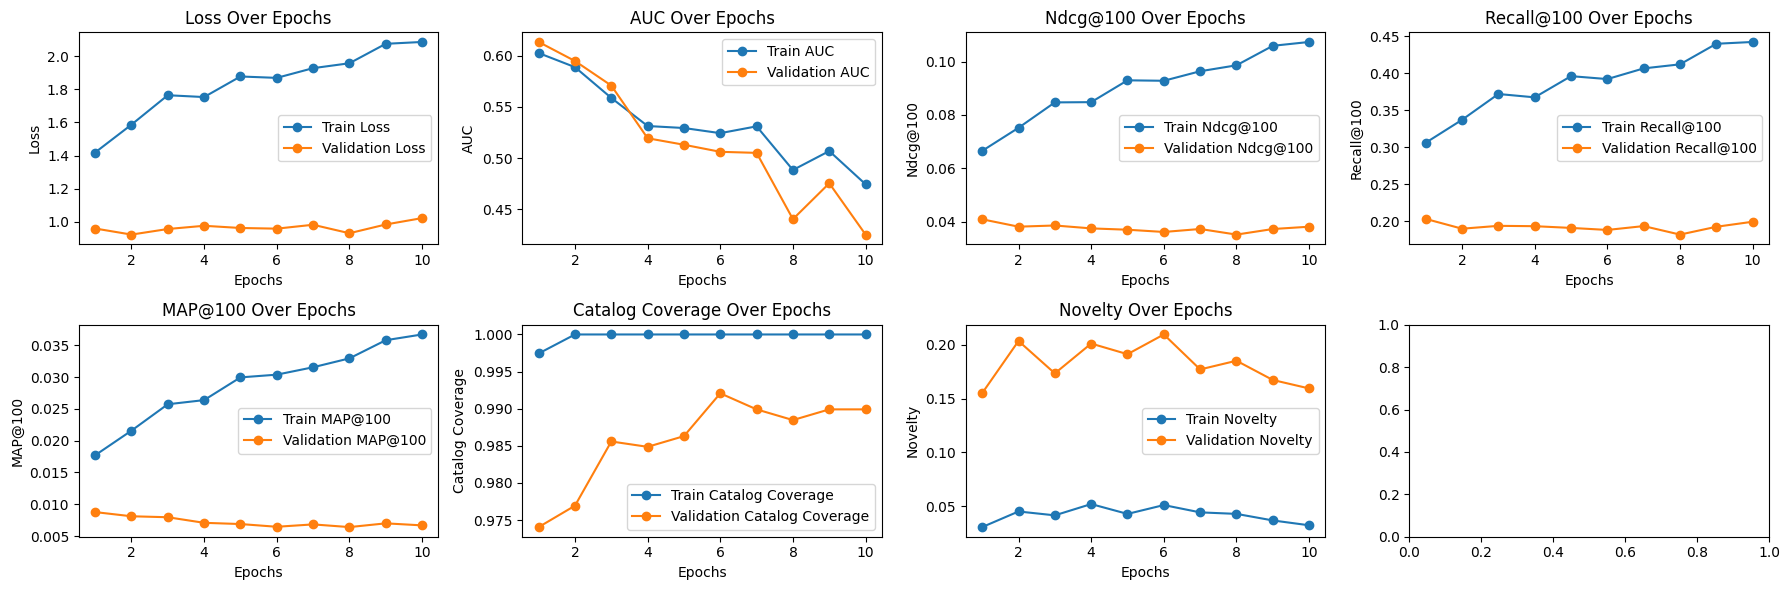

In [97]:
_history = train_evaluation_clbk.get_records()
_history_val = valid_evaluation_clbk.get_records()
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
_metrics  = {
    'Loss': 'loss',
    'AUC': AUC_TERM,
    'Ndcg@100': 'ndcg_at_100',
    'Recall@100': 'recall_at_100',
    'MAP@100':'map_at_100',
    'Catalog Coverage': 'coverage',
    'Novelty':'novelty'
}
print('Plot for model', VERSION)
plot_metrics(_history, _history_val, _metrics)


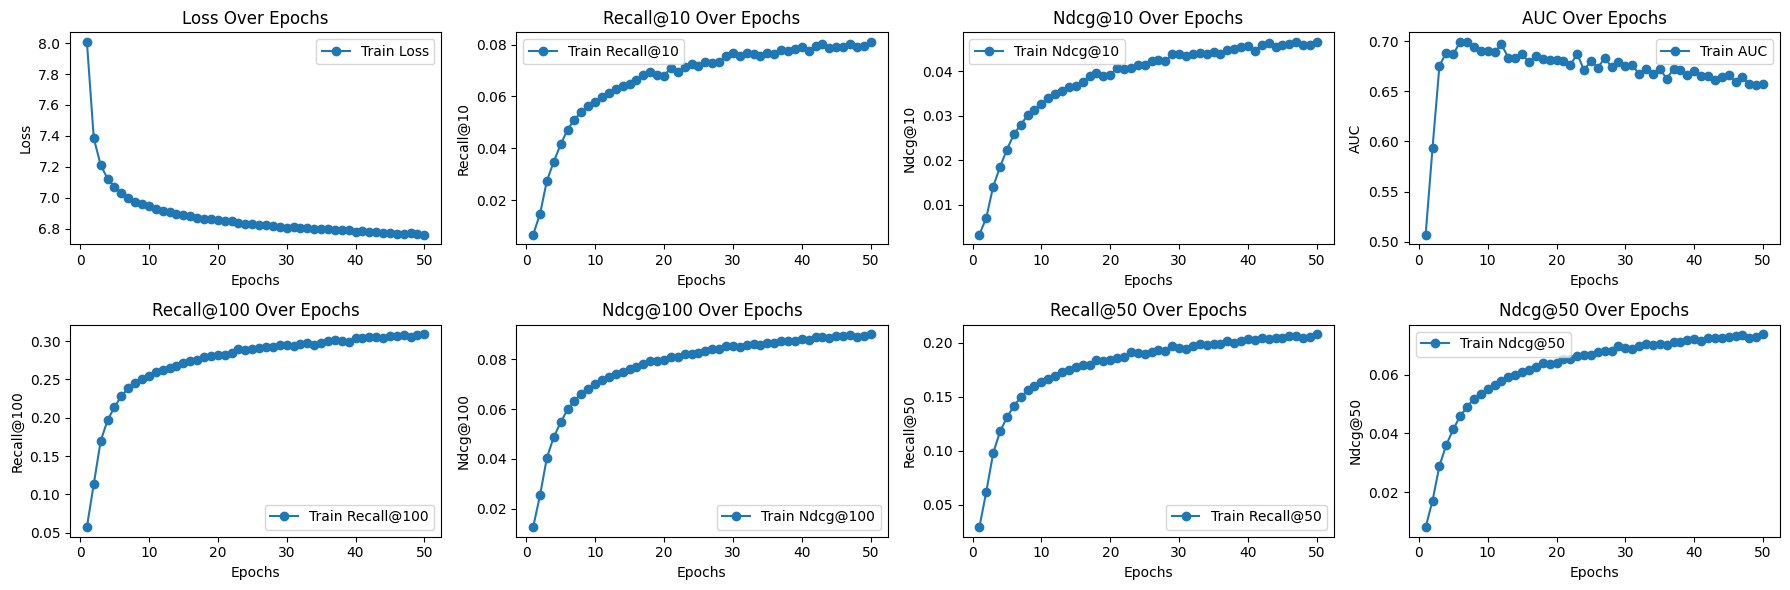

In [98]:
_history = merge_model_history(*history)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, None, default_plot_metrics | {'AUC': AUC_TERM, **METRIC_AT})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

#### eval

In [ ]:
# (model.evaluate(train, batch_size=2048, return_dict=True),
#  model.evaluate(valid, batch_size=2048, return_dict=True))

8/8 [==============================] - 1s 70ms/step - loss: 7.8620 - auc: 0.5681 - recall_at_100: 0.1212 - mrr_at_100: 0.0186 - ndcg_at_100: 0.0356 - map_at_100: 0.0186 - precision_at_100: 0.0012 - recall_at_10: 0.0227 - mrr_at_10: 0.0161 - ndcg_at_10: 0.0176 - map_at_10: 0.0161 - precision_at_10: 0.0023 - regularization_loss: 0.0000e+00 - loss_batch: 7.8307


({'loss': 6.699263095855713,
  'auc': 0.668052077293396,
  'recall_at_100': 0.3233526051044464,
  'mrr_at_100': 0.05222870782017708,
  'ndcg_at_100': 0.10056475549936295,
  'map_at_100': 0.05222870782017708,
  'precision_at_100': 0.0032335256692022085,
  'recall_at_10': 0.095282182097435,
  'mrr_at_10': 0.04530993476510048,
  'ndcg_at_10': 0.056927017867565155,
  'map_at_10': 0.04530993476510048,
  'precision_at_10': 0.00952821783721447,
  'regularization_loss': 0.0,
  'loss_batch': 4.1432576179504395},
 {'loss': 7.861959934234619,
  'auc': 0.5680776238441467,
  'recall_at_100': 0.13334225118160248,
  'mrr_at_100': 0.01585257612168789,
  'ndcg_at_100': 0.03536121919751167,
  'map_at_100': 0.01585257612168789,
  'precision_at_100': 0.0013334223767742515,
  'recall_at_10': 0.020997727289795876,
  'mrr_at_10': 0.012997585348784924,
  'ndcg_at_10': 0.014806998893618584,
  'map_at_10': 0.012997585348784924,
  'precision_at_10': 0.0020997729152441025,
  'regularization_loss': 0.0,
  'loss_ba

In [90]:
evaluate_model(model, train, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 21ms/step - loss: 1.9736 - auc_115: 0.5622 - recall_at_100: 0.4190 - mrr_at_100: 0.0331 - ndcg_at_100: 0.0999 - map_at_100: 0.0331 - precision_at_100: 0.0042 - regularization_loss: 0.0000e+00 - loss_batch: 1.9839
Candidate set rows: 943


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


{'loss': 1.9736461639404297,
 'auc_115': 0.5622369050979614,
 'recall_at_100': 0.41662630438804626,
 'mrr_at_100': 0.03330601006746292,
 'ndcg_at_100': 0.09968777745962143,
 'map_at_100': 0.03330601006746292,
 'precision_at_100': 0.004166263621300459,
 'regularization_loss': 0.0,
 'loss_batch': 2.469111919403076,
 'coverage': 1.0,
 'novelty': 0.04267933921701742}

In [ ]:
evaluate_model(model, valid, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 4s 33ms/step - loss: 0.9953 - auc_22: 0.4727 - recall_at_100: 0.1899 - mrr_at_100: 0.0059 - ndcg_at_100: 0.0358 - map_at_100: 0.0059 - precision_at_100: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 1.0450
Candidate set rows: 943


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


{'loss': 0.9952747225761414,
 'auc_22': 0.4727213978767395,
 'recall_at_100': 0.19292497634887695,
 'mrr_at_100': 0.006211184896528721,
 'ndcg_at_100': 0.0365414135158062,
 'map_at_100': 0.006211184896528721,
 'precision_at_100': 0.0019292497308924794,
 'regularization_loss': 0.0,
 'loss_batch': 1.5650469064712524,
 'coverage': 1.0,
 'novelty': 0.18732618196265396}

### Model

In [ ]:
tower_dim = 64

# create user schema using USER tag
user_schema = schema.select_by_tag(Tags.USER)
# create user (query) tower input block
user_inputs = mm.InputBlockV2(user_schema)
# create user (query) encoder block
query = mm.Encoder(user_inputs, mm.MLPBlock([128, tower_dim], no_activation_last_layer=True))

# create item schema using ITEM tag
item_schema = schema.select_by_tag(Tags.ITEM)
# create item (candidate) tower input block
item_inputs = mm.InputBlockV2(item_schema, categorical=item_embeddings_block)
# create item (candidate) encoder block
candidate = mm.Encoder(item_inputs, mm.MLPBlock([128, tower_dim], no_activation_last_layer=True))

In [ ]:
model = mm.TwoTowerModelV2(query, candidate)

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer=opt, run_eagerly=False, metrics=[mm.RecallAt(10), mm.NDCGAt(10), tf.keras.metrics.AUC()])
history = model.fit(train, validation_data=valid, batch_size=64, epochs=5)

/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.USER: 'user'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.ITEM_ID have been deprecated and will be removed in a future version. Please use the atomic versions of these tags, like [<Tags.ITEM: 'item'>, <Tags.ID: 'id'>].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/schema/tags.py:149: UserWarning: Compound tags like Tags.USER_ID have been deprecated and will be removed i

InvalidArgumentError: ignored

In [ ]:
history.history

{'loss': [4.157214641571045,
  4.157159805297852,
  4.157199382781982,
  4.15723180770874,
  4.157191276550293],
 'auc_5': [0.5, 0.5, 0.5, 0.5, 0.5004699230194092],
 'recall_at_10': [0.823199987411499,
  0.8248000144958496,
  0.7919999957084656,
  0.7440000176429749,
  0.7386375069618225],
 'ndcg_at_10': [0.823199987411499,
  0.8248000144958496,
  0.7919999957084656,
  0.7440000176429749,
  0.7378268837928772],
 'regularization_loss': [0.0, 0.0, 0.0, 0.0, 0.0],
 'loss_batch': [4.157838821411133,
  4.156914710998535,
  4.158390998840332,
  4.156350135803223,
  4.156854629516602],
 'val_loss': [124.23328399658203,
  83.68626403808594,
  115.26092529296875,
  133.5514678955078,
  75.48359680175781],
 'val_auc_5': [0.5000507831573486,
  0.500053882598877,
  0.5000523328781128,
  0.5000523328781128,
  0.5000022053718567],
 'val_recall_at_10': [0.9998000264167786,
  0.9986000061035156,
  1.0,
  0.9986000061035156,
  0.005100000184029341],
 'val_ndcg_at_10': [0.9007440209388733,
  0.895921945

## Evaluate the Model top-k results

In [78]:
test = merlin.io.Dataset(
    TEST_PATHS, engine="parquet"
)
test_df = test.to_ddf().compute()

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [119]:
data = test
data_df = test_df

### Cold Start

In [192]:
candidate_features = get_candidates(data)
topk = 100
batch_size=2048
model = model_v6

topk_model = to_top_k_encoder(model, candidate_features, k=topk, batch_size=batch_size)
topk_model.compile(run_eagerly=False, metrics=[
    mm.RecallAt(topk), mm.NDCGAt(topk), mm.MRRAt(topk)
])

Candidate set rows: 1432


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [193]:
cold_movies = list(set(data_df['movie_id'].unique()).difference(set(train_df['movie_id'].unique())))
len(cold_movies)

72

In [194]:
hot_movies = list(train_df['movie_id'].value_counts(ascending=False)[:50])
len(hot_movies)

50

In [195]:
target_movies = cold_movies
eval_loader = mm.Loader(data, batch_size=2048, shuffle=False)
_iter = iter(eval_loader)

In [196]:
from collections import defaultdict
movie_count = defaultdict(set)

for batch, _ in _iter:
    r = topk_model(batch)[1].numpy()
    for mid in target_movies:
        mask = np.any(r == mid, axis=1)
        movie_count[mid] |= set(tf.boolean_mask(batch['user_id'], mask).numpy())
    # count_user_recommended += np.sum(np.any(np.isin(r, target_movies), axis=1))

In [197]:
_table = []
for k,v in movie_count.items():
    user_watched = set(data_df[data_df['movie_id'] == k]['user_id'])
    actual_watched = (data_df['movie_id'] == k).sum()
    _table.append([k, len(v), len(user_watched.intersection(v)), actual_watched])
    # print(k, len(v), len(user_watched.intersection(v)), actual_watched)

In [198]:
total_watched = 0
total_rec = 0
for x in _table:
    total_watched += x[2]
    total_rec += x[1]
total_watched/total_rec

0.004388370817334065

In [199]:
from tabulate import tabulate
print(tabulate(_table, headers=('movie_id', '#users recommended', '#users watched', '#actual watches')))

  movie_id    #users recommended    #users watched    #actual watches
----------  --------------------  ----------------  -----------------
      1664                    20                 0                  1
      1538                     0                 0                  1
      1539                   120                 1                  1
      1414                     2                 0                  2
      1655                    34                 0                  1
      1544                     0                 0                  1
      1547                     5                 0                  1
      1423                    13                 0                  2
      1552                     0                 0                  1
      1553                     2                 0                  1
      1426                     0                 0                  3
      1555                     3                 0                  1
      1558          

### Previous

In [93]:
from tabulate import tabulate
print(tabulate(_table, headers=('movie_id', '#users recommended', '#users watched', '#actual watches')))

  movie_id    #users recommended    #users watched    #actual watches
----------  --------------------  ----------------  -----------------
      1664                    10                 0                  1
      1538                     0                 0                  1
      1539                    98                 0                  1
      1414                     6                 0                  2
      1655                    21                 0                  1
      1544                     2                 0                  1
      1547                     2                 0                  1
      1423                     8                 0                  2
      1552                     0                 0                  1
      1553                     5                 0                  1
      1426                     4                 0                  3
      1555                     5                 1                  1
      1558          

# TMP

In [44]:
model_v7

RetrievalModelV2(
  (_should_compute_train_metrics_for_batch): <tf.Variable 'should_compute_train_metrics_for_batch:0' shape=() dtype=bool, numpy=True>
  (blocks): _TupleWrapper((ParallelBlock(
    (parallel_layers): Dict(
      (query): Encoder(
        (blocks): List(
          (0): ParallelBlock(
            (_aggregation): ConcatFeatures(
              (_feature_shapes): Dict(
                (movie_id): TensorShape([4096])
                (user_id): TensorShape([4096])
                (gender): TensorShape([4096])
                (occupation): TensorShape([4096])
                (synopsis): TensorShape([4096])
                (title): TensorShape([4096])
                (genres__values): TensorShape([8787])
                (genres__offsets): TensorShape([4097])
                (cast__values): TensorShape([21036])
                (cast__offsets): TensorShape([4097])
              )
              (_feature_dtypes): Dict(
                (movie_id): tf.int64
                (user_id)